May refer to this to develop LSTM

https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

Data Split​

1. Twitter (80% Train, 20% Test)​

2. Reddit (80% Train, 20% Test)​

3. Twitter (100% Train) & Reddit (100% Test)​

4. Reddit (100% Train) & Twitter (100% Test)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
twitter = pd.read_csv('twitter_cleaned_stemmed-2.csv', index_col=False)
reddit = pd.read_csv('reddit_cleaned_stemmed.csv', index_col=False)

In [4]:
reddit.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'text', 'class'], dtype='object')

In [5]:
reddit.drop({'Unnamed: 0.1', 'Unnamed: 0'}, axis=1, inplace=True)

In [6]:
twitter.columns

Index(['Unnamed: 0', 'Tweet', 'Suicide'], dtype='object')

In [7]:
twitter.drop({'Unnamed: 0'}, axis=1, inplace=True)

In [15]:
twitter.rename(columns={'Tweet': 'text', 'Suicide': 'class'}, inplace=True)

In [8]:
twitter

Tweet  Suicide
0                                             make lunch        0
1                                      alexia want money        0
2      dizzyhrvi crap took forev put togeth iam go go...        1
3           jnaylor kiwitweet hey jer sinc start twitter        0
4      tri quot delici librari quot mix result bar co...        0
...                                                  ...      ...
10901  ever laid bed night cri good enough count flaw...        1
10902  fault blame pain still alon insid broken home ...        1
10903  stop ask trust still cough water last time let...        1
10904          never know handl sad cri make feel stupid        1
10905  cancer take life blame cancer depress disea bl...        1

[10906 rows x 2 columns]

In [9]:
reddit.dropna(how='any', inplace=True)
twitter.dropna(how='any', inplace=True)

In [10]:
reddit.shape

(231972, 2)

In [11]:
le = LabelEncoder()
reddit['class'] = le.fit_transform(reddit['class'])

In [12]:
reddit['class'].value_counts()

class
1    116015
0    115957
Name: count, dtype: int64

In [16]:
X_twitter = twitter['text']
y_twitter = twitter['class']

X_reddit = reddit['text']
y_reddit = reddit['class']

In [17]:
X_twitter.isna().sum()

0

In [18]:
X_trainreddit, X_testreddit, y_trainreddit, y_testreddit80 = train_test_split(X_reddit, y_reddit, test_size=0.2, random_state=42)
X_traintwitter, X_testtwitter, y_traintwitter, y_testtwitter = train_test_split(X_twitter, y_twitter, test_size=0.2, random_state=42)

In [19]:
bow = TfidfVectorizer(ngram_range=(1, 1), min_df=1, max_df=20000, stop_words='english')
X_trainreddit_tfidf = bow.fit_transform(X_trainreddit)
X_testreddit_tfidf = bow.transform(X_testreddit)
X_traintwitter_tfidf = bow.fit_transform(X_traintwitter)
X_testtwitter_tfidf = bow.transform(X_testtwitter)

In [20]:
unigram_vect = CountVectorizer(ngram_range=(1, 1), min_df=1, max_df=10000)

X_trainreddit_cv = unigram_vect.fit_transform(X_trainreddit)
X_testreddit_cv = unigram_vect.transform(X_testreddit)
X_traintwitter_cv = unigram_vect.fit_transform(X_traintwitter)
X_testtwitter_cv = unigram_vect.transform(X_testtwitter)

In [21]:
sampler = SMOTEENN(sampling_strategy = 'all',random_state = 123, n_jobs = -1)
X_train_twitter_tfdidf_smote, y_train_twitter_tfidf_smote = sampler.fit_resample(X_traintwitter_tfidf, y_traintwitter)
X_train_twitter_cv_smote, y_train_twitter_cv_smote = sampler.fit_resample(X_traintwitter_cv, y_traintwitter)

/Users/juinnshengna/Desktop/wqd7005 assignment/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/juinnshengna/Desktop/wqd7005 assignment/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Dimensionality Reduction

In [22]:
lsa = TruncatedSVD(n_components=100)
X_trainreddit_tfidf_lsa = lsa.fit_transform(X_trainreddit_tfidf)
X_testreddit_tfidf_lsa = lsa.transform(X_testreddit_tfidf)

In [23]:
X_trainreddit80_cv_lsa = lsa.fit_transform(X_trainreddit_cv)
X_testreddit80_cv_lsa = lsa.transform(X_testreddit_cv)

In [24]:
X_train_twitter_tfidf_smote_lsa = lsa.fit_transform(X_train_twitter_tfdidf_smote)
X_test_twitter80_tfidf = lsa.transform(X_testtwitter_tfidf)
X_train_twitter_cv_smote_lsa = lsa.fit_transform(X_train_twitter_cv_smote)
X_test_twitter80_cv = lsa.transform(X_testtwitter_cv)

In [25]:
from imblearn.combine import SMOTEENN
sampler = SMOTEENN(sampling_strategy = 'all',random_state = 123, n_jobs = -1)
X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote = sampler.fit_resample(X_trainreddit_tfidf_lsa, y_trainreddit)

/Users/juinnshengna/Desktop/wqd7005 assignment/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [26]:
X_trainreddit80_cv_lsa_smote, y_trainreddit80_cv_smote = sampler.fit_resample(X_trainreddit80_cv_lsa, y_trainreddit)

/Users/juinnshengna/Desktop/wqd7005 assignment/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


1. Reddit80Twitter20 TFIDF SMOTEENN


Metrics for Random Forest:
Accuracy: 0.5091996320147194
Precision: 0.4605021432945499
Recall: 0.8017057569296375
F1-score: 0.5849863866199922


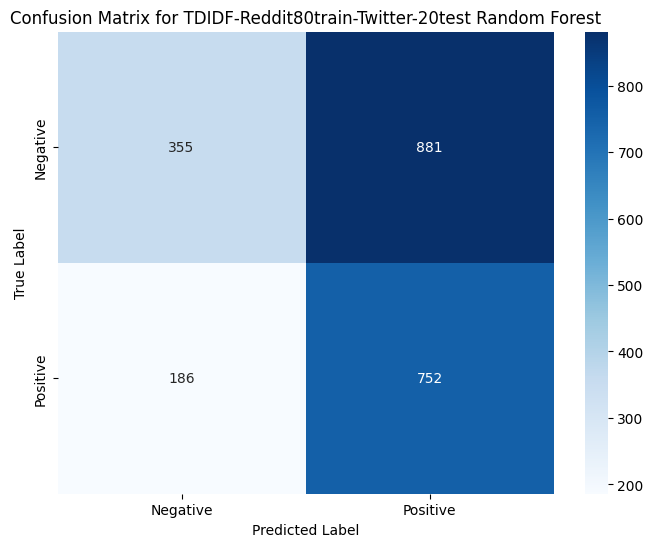


Metrics for Logistic Regression:
Accuracy: 0.7460901563937442
Precision: 0.6926147704590818
Recall: 0.7398720682302772
F1-score: 0.7154639175257732


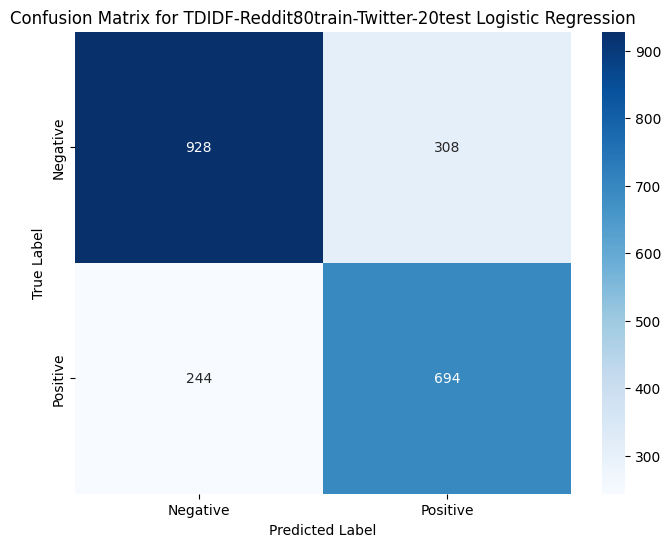


Metrics for SVM:
Accuracy: 0.7267709291628335
Precision: 0.6802935010482181
Recall: 0.6918976545842217
F1-score: 0.686046511627907


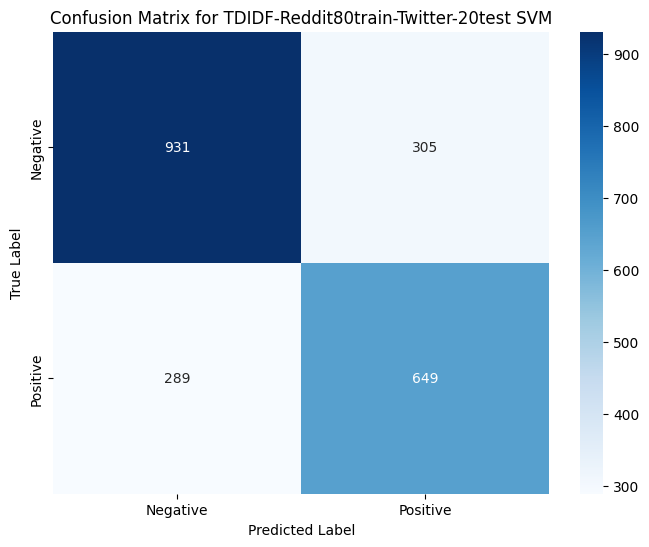


Metrics for Decision Tree:
Accuracy: 0.5105795768169273
Precision: 0.4632438739789965
Recall: 0.8464818763326226
F1-score: 0.5987933634992458


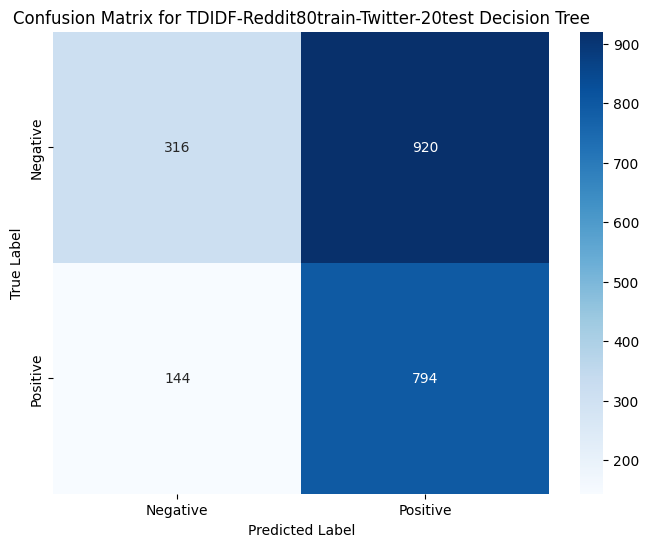


Metrics for KNN:
Accuracy: 0.7483900643974241
Precision: 0.784570596797671
Recall: 0.5746268656716418
F1-score: 0.6633846153846154


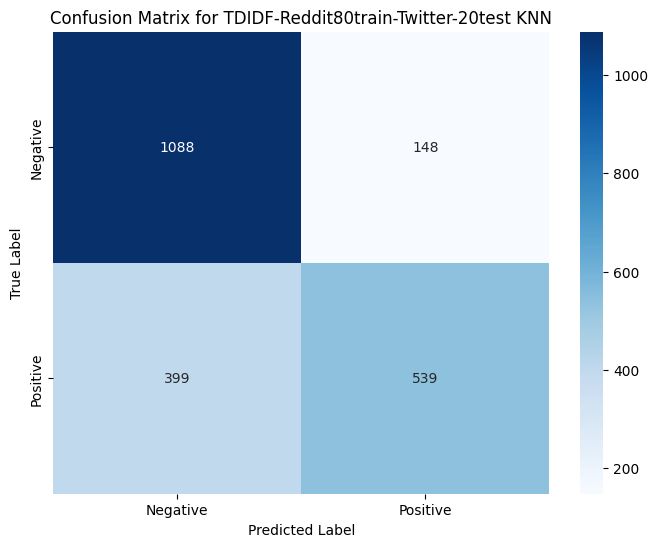


Metrics for XGBoost:
Accuracy: 0.5078196872125115
Precision: 0.46076099881093935
Recall: 0.826226012793177
F1-score: 0.5916030534351145


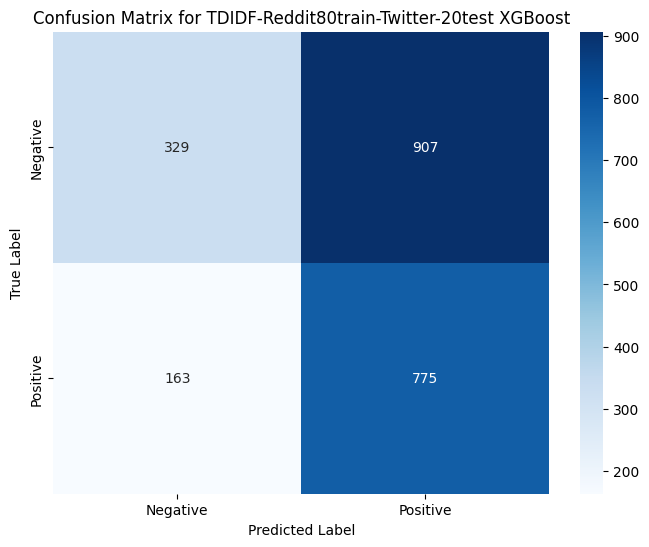

In [28]:
import numpy as np
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

for clf_name, clf in classifiers.items():
    clf.fit(X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote)
    reddittrain80predictionstfidf = clf.predict(X_test_twitter80_tfidf)

    accuracyreddittrain80tfidf = accuracy_score(y_testtwitter, reddittrain80predictionstfidf)
    precisionreddittrain80tfidf = precision_score(y_testtwitter, reddittrain80predictionstfidf)
    recallreddittrain80tfidf = recall_score(y_testtwitter, reddittrain80predictionstfidf)
    f1reddittrain80tfidf = f1_score(y_testtwitter, reddittrain80predictionstfidf)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:",  accuracyreddittrain80tfidf)
    print("Precision:", precisionreddittrain80tfidf)
    print("Recall:", recallreddittrain80tfidf)
    print("F1-score:", f1reddittrain80tfidf)

    # Confusion matrix
    conf_matrixreddittrain80tfidf = confusion_matrix(y_testtwitter, reddittrain80predictionstfidf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrixreddittrain80tfidf, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for TDIDF-Reddit80train-Twitter-20test {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


Reddit80Twitter20 CV SMOTEENN


Metrics for Random Forest:
Accuracy: 0.5501379944802208
Precision: 0.4618320610687023
Recall: 0.2579957356076759
F1-score: 0.33105335157318744


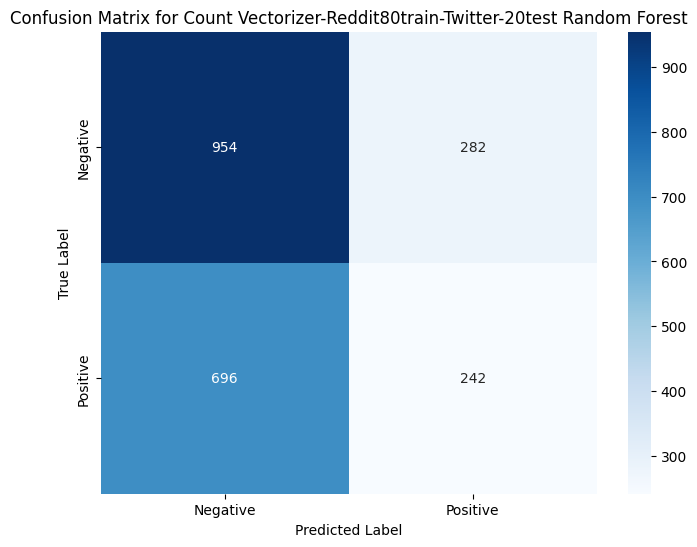


Metrics for Logistic Regression:
Accuracy: 0.5970561177552898
Precision: 0.5861111111111111
Recall: 0.22494669509594883
F1-score: 0.325115562403698


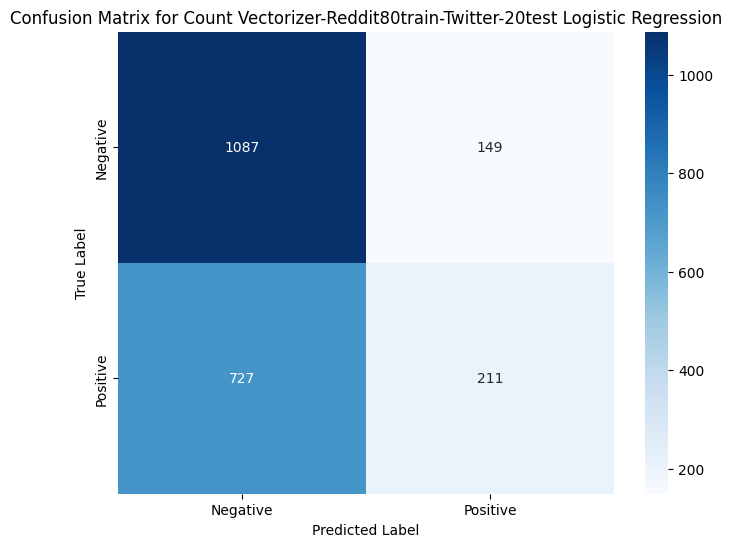


Metrics for SVM:
Accuracy: 0.6274149034038639
Precision: 0.8764705882352941
Recall: 0.15884861407249468
F1-score: 0.26895306859205775


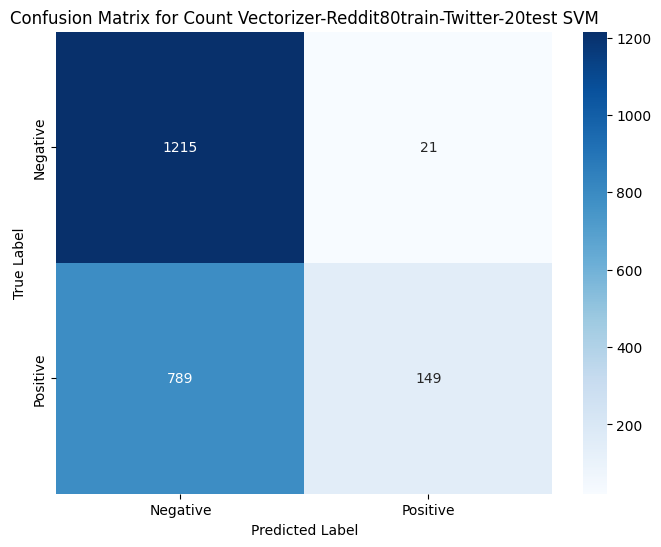


Metrics for Decision Tree:
Accuracy: 0.5381784728610856
Precision: 0.4642082429501085
Recall: 0.4562899786780384
F1-score: 0.46021505376344085


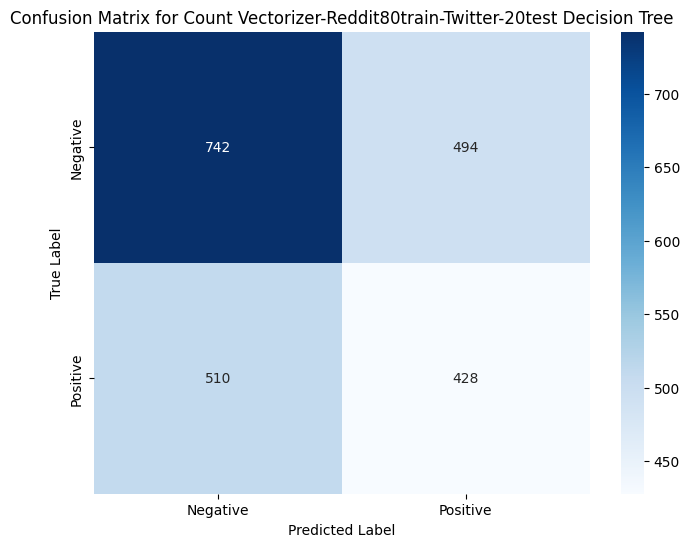


Metrics for KNN:
Accuracy: 0.5423183072677092
Precision: 0.2564102564102564
Recall: 0.031982942430703626
F1-score: 0.05687203791469194


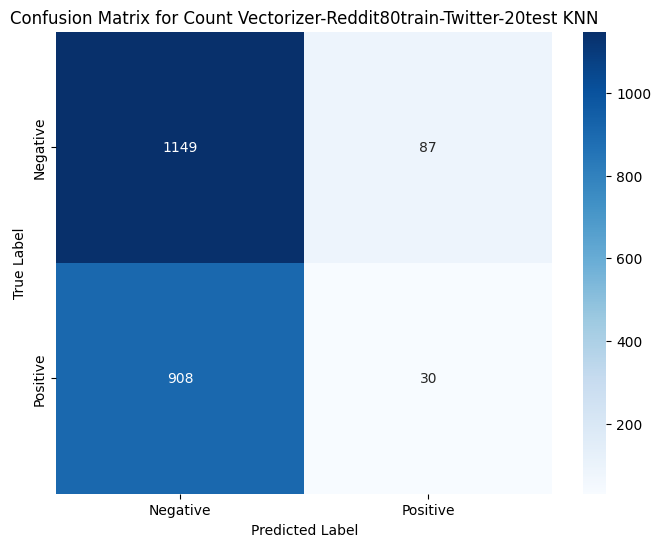


Metrics for XGBoost:
Accuracy: 0.5188592456301748
Precision: 0.3383233532934132
Recall: 0.12046908315565032
F1-score: 0.17767295597484276


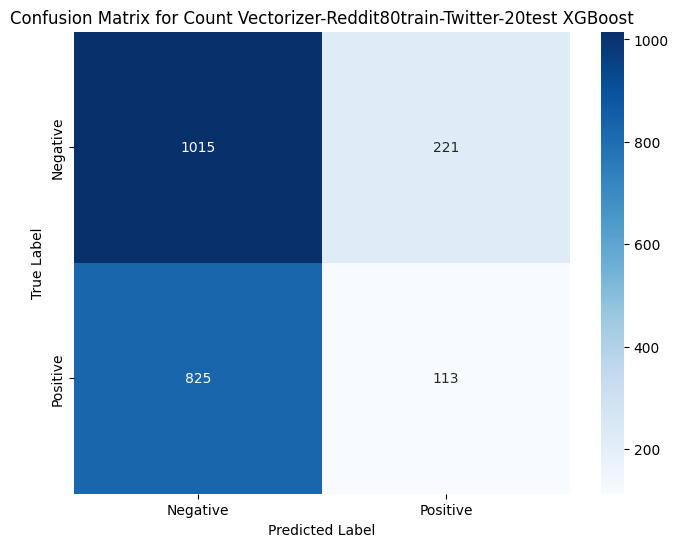

In [26]:
import numpy as np
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_trainreddit80_cv_lsa_smote, y_trainreddit80_cv_smote)
    reddittrain80predictionscount = clf.predict(X_test_twitter80_cv)
    reddittrain80predictionscount = np.round(reddittrain80predictionscount)

    accuracyreddittrain80count = accuracy_score(y_testtwitter, reddittrain80predictionscount)
    precisionreddittrain80count = precision_score(y_testtwitter, reddittrain80predictionscount)
    recallreddittrain80count = recall_score(y_testtwitter, reddittrain80predictionscount)
    f1reddittrain80count = f1_score(y_testtwitter, reddittrain80predictionscount)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:", accuracyreddittrain80count)
    print("Precision:", precisionreddittrain80count)
    print("Recall:", recallreddittrain80count)
    print("F1-score:", f1reddittrain80count)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_testtwitter,  reddittrain80predictionscount)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for Count Vectorizer-Reddit80train-Twitter-20test {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

2. Reddit80-Reddit80 TFIDF SMOTEENN


Metrics for Random Forest:
Accuracy: 0.8529798469662679
Precision: 0.9073255525204867
Recall: 0.7866431277988288
F1-score: 0.8426854862888905


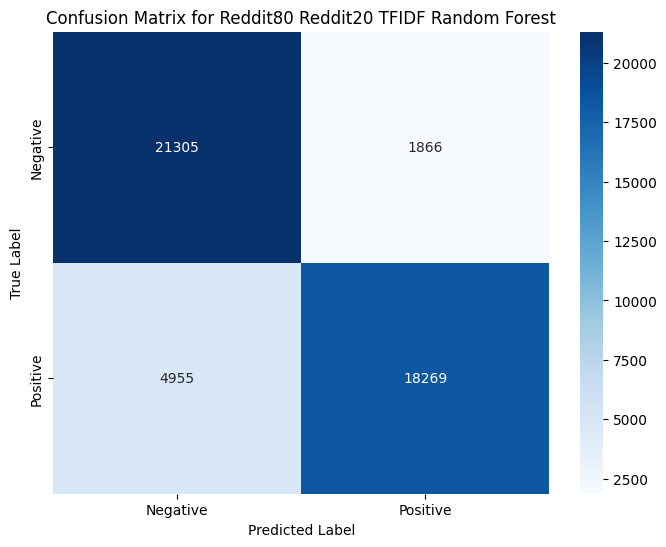


Metrics for Logistic Regression:
Accuracy: 0.8594029529044078
Precision: 0.9214657043355373
Recall: 0.7861264209438512
F1-score: 0.848432743918024


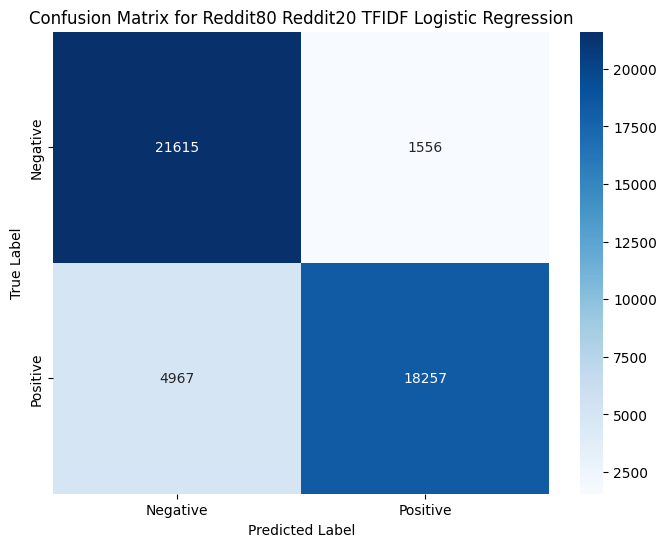


Metrics for SVM:
Accuracy: 0.8659984912167259
Precision: 0.9194495141320969
Recall: 0.8026179813985532
F1-score: 0.8570706025702922


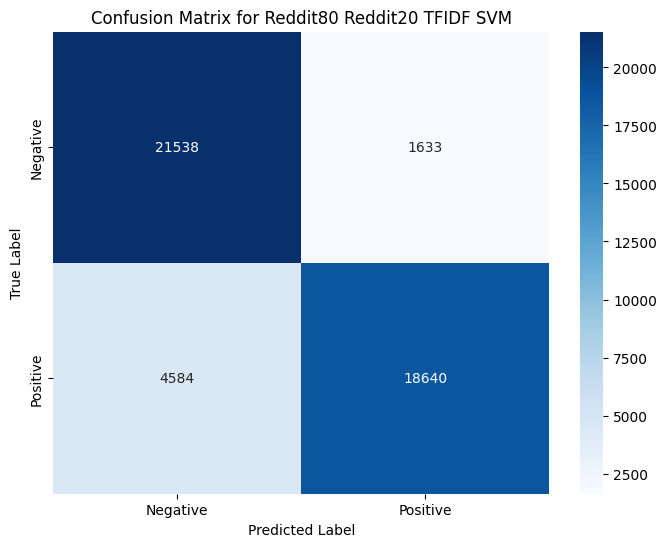


Metrics for Decision Tree:
Accuracy: 0.8378057980385818
Precision: 0.8843837226384604
Recall: 0.7776438167413021
F1-score: 0.8275862068965517


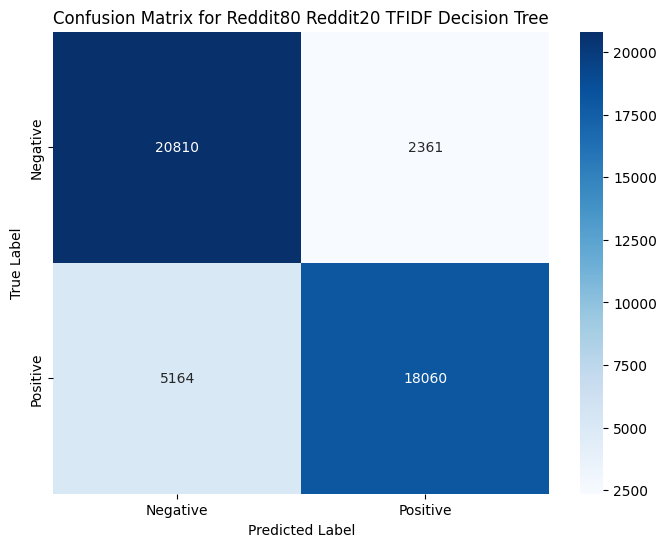


Metrics for KNN:
Accuracy: 0.749692854833495
Precision: 0.9084640821782874
Recall: 0.5559765759559077
F1-score: 0.6897988620883083


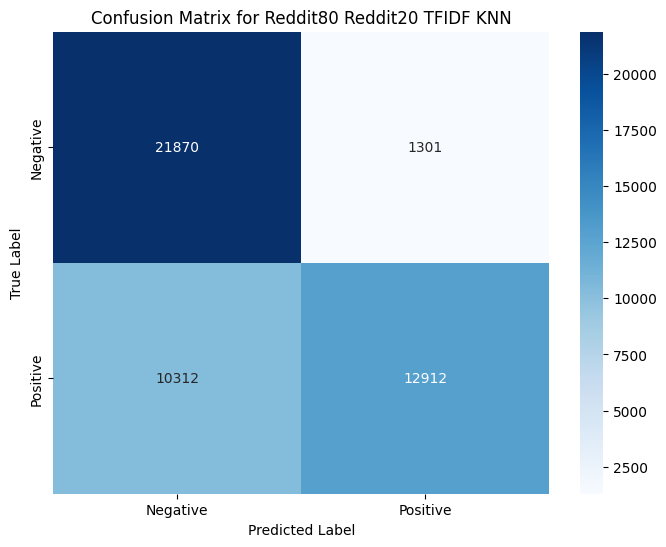


Metrics for XGBoost:
Accuracy: 0.8655243021877358
Precision: 0.9129990760103098
Recall: 0.8083878746124699
F1-score: 0.8575147874940051


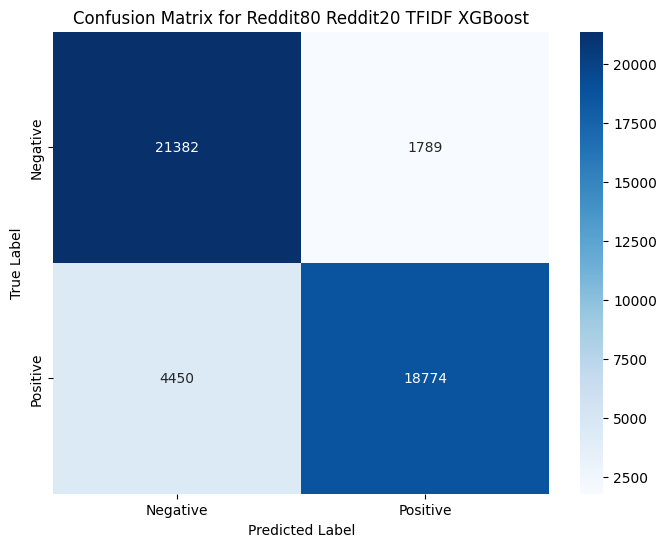

In [26]:
import numpy as np
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote)
    r80r80tfidf = clf.predict(X_testreddit_tfidf_lsa)
    r80r80tfidf = np.round(r80r80tfidf)

    accuracyr80r80tfidf = accuracy_score(y_testreddit80, r80r80tfidf)
    precisionr80r80tfidf = precision_score(y_testreddit80, r80r80tfidf)
    recallr80r80tfidf = recall_score(y_testreddit80, r80r80tfidf)
    f1r80r80tfidf = f1_score(y_testreddit80, r80r80tfidf)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:",  accuracyr80r80tfidf)
    print("Precision:",  precisionr80r80tfidf)
    print("Recall:", recallr80r80tfidf)
    print("F1-score:", f1r80r80tfidf)

    # Confusion matrix
    conf_matrixr80r80tfidf = confusion_matrix(y_testreddit80, r80r80tfidf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrixr80r80tfidf, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for Reddit80 Reddit20 TFIDF {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Twitter80-Twitter80-TFIDF


Metrics for Random Forest:
Accuracy: 0.5423183072677092
Precision: 0.48517940717628705
Recall: 0.9946695095948828
F1-score: 0.6522195036700456


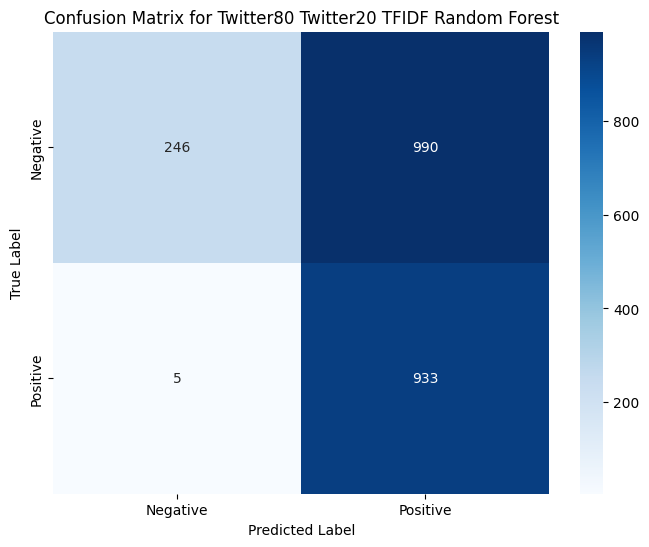


Metrics for Logistic Regression:
Accuracy: 0.468721251149954
Precision: 0.44816053511705684
Recall: 1.0
F1-score: 0.6189376443418014


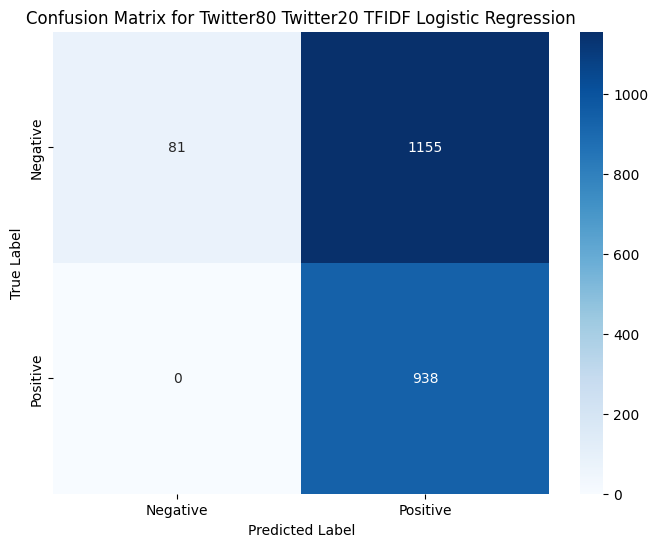


Metrics for SVM:
Accuracy: 0.5271389144434223
Precision: 0.47706422018348627
Recall: 0.997867803837953
F1-score: 0.6455172413793103


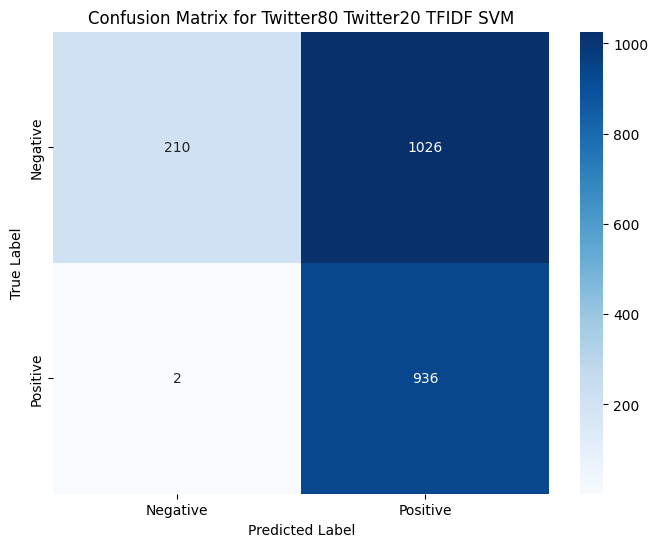


Metrics for Decision Tree:
Accuracy: 0.6044158233670653
Precision: 0.5221843003412969
Recall: 0.9786780383795309
F1-score: 0.6810089020771513


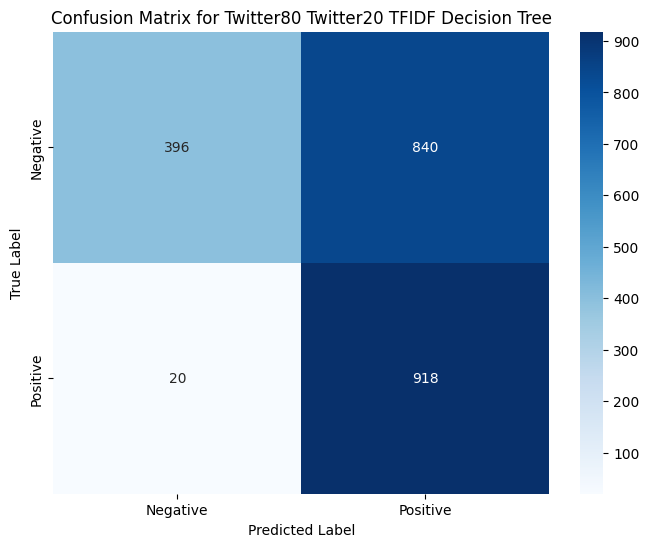


Metrics for KNN:
Accuracy: 0.6517939282428703
Precision: 0.5551492992078001
Recall: 0.9712153518123667
F1-score: 0.7064753780535091


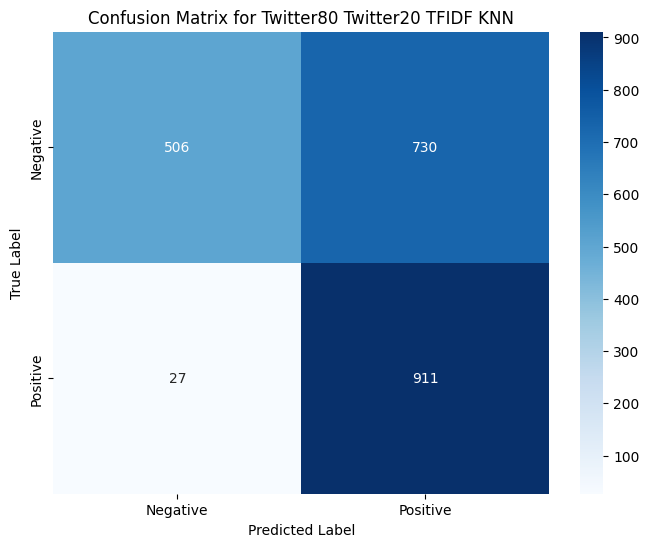


Metrics for XGBoost:
Accuracy: 0.6007359705611776
Precision: 0.5195749440715883
Recall: 0.990405117270789
F1-score: 0.6815847395451211


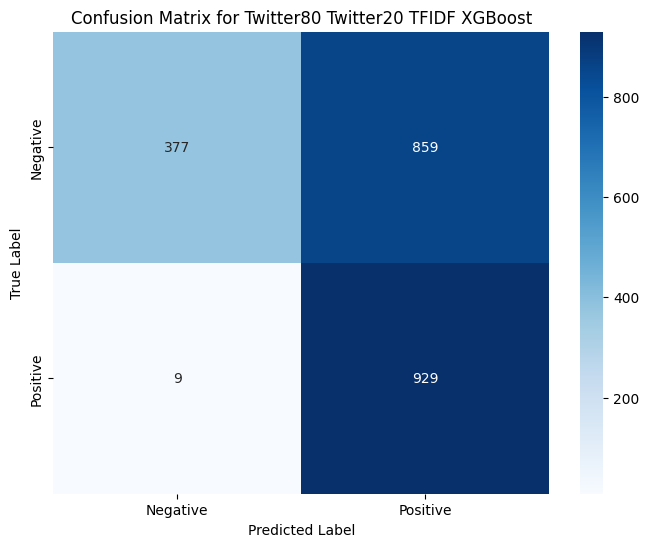

In [27]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_twitter_tfidf_smote_lsa, y_train_twitter_tfidf_smote)
    t80t80tfidf = clf.predict(X_test_twitter80_tfidf)
    t80t80tfidf = np.round(t80t80tfidf)

    accuracyt80t80tfidf = accuracy_score(y_testtwitter, t80t80tfidf)
    precisiont80t80tfidf = precision_score(y_testtwitter, t80t80tfidf)
    recallt80t80tfidf = recall_score(y_testtwitter, t80t80tfidf)
    f1t80t80tfidf = f1_score(y_testtwitter, t80t80tfidf)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:",  accuracyt80t80tfidf )
    print("Precision:",  precisiont80t80tfidf)
    print("Recall:", recallt80t80tfidf)
    print("F1-score:", f1t80t80tfidf)

    # Confusion matrix
    conf_matrixr80r80tfidf = confusion_matrix(y_testtwitter, t80t80tfidf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrixr80r80tfidf, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for Twitter80 Twitter20 TFIDF {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Reddit80Reddit80CV


Metrics for Random Forest:
Accuracy: 0.8397672162948594
Precision: 0.8682712939639892
Recall: 0.8014984498794351
F1-score: 0.8335497738569702


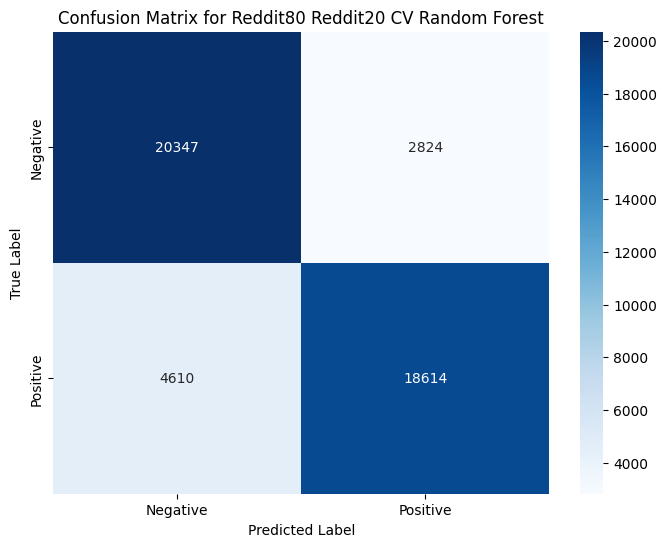

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Metrics for Logistic Regression:
Accuracy: 0.8373747171031362
Precision: 0.8819116285867394
Recall: 0.7794953496383052
F1-score: 0.8275467989303101


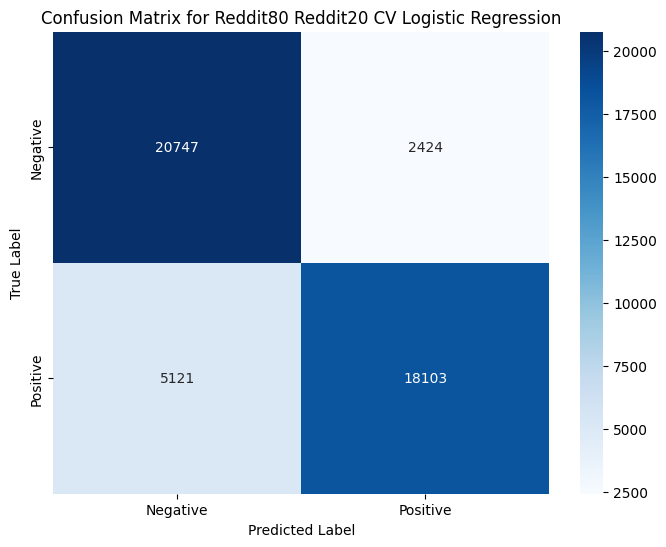


Metrics for SVM:
Accuracy: 0.7993964866903761
Precision: 0.9146159804564142
Recall: 0.6609541853255253
F1-score: 0.7673657110005748


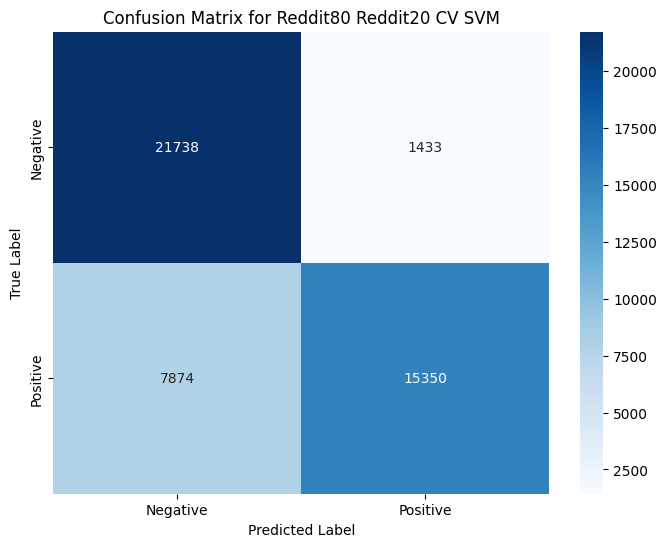


Metrics for Decision Tree:
Accuracy: 0.8163379674533894
Precision: 0.8368693580167713
Recall: 0.78638477437134
F1-score: 0.8108420094567896


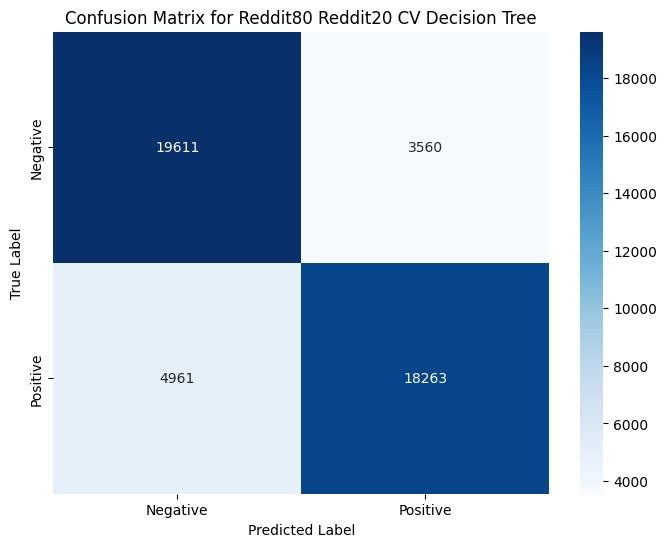


Metrics for KNN:
Accuracy: 0.7965513525164349
Precision: 0.8596399686929298
Recall: 0.7093954529796762
F1-score: 0.7773243058340606


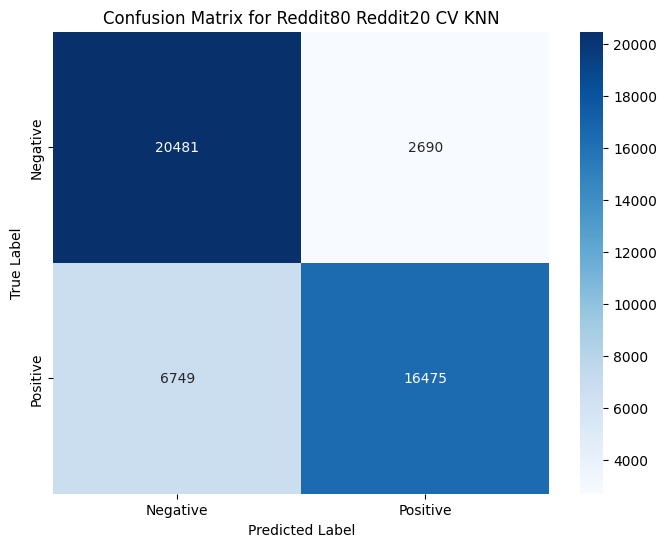


Metrics for XGBoost:
Accuracy: 0.8519236986744261
Precision: 0.8764732965009208
Recall: 0.8197123665173958
F1-score: 0.8471431114275543


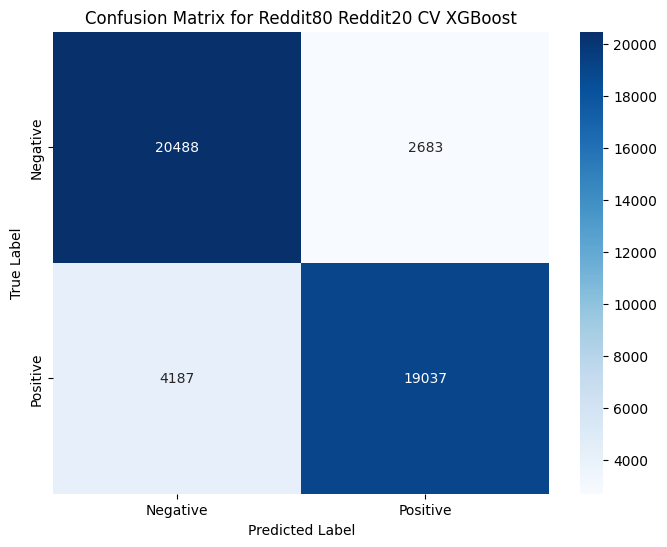

In [28]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_trainreddit80_cv_lsa_smote, y_trainreddit80_cv_smote)
    r80r80cv = clf.predict(X_testreddit80_cv_lsa)
    r80r80cv = np.round(r80r80cv)

    accuracyr80r80cv = accuracy_score(y_testreddit80, r80r80cv)
    precisionr80r80cv = precision_score(y_testreddit80, r80r80cv)
    recallr80r80cv = recall_score(y_testreddit80, r80r80cv)
    f1r80r80cv = f1_score(y_testreddit80, r80r80cv)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:", accuracyr80r80cv)
    print("Precision:", precisionr80r80cv)
    print("Recall:", recallr80r80cv)
    print("F1-score:", f1r80r80cv)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_testreddit80,  r80r80cv)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for Reddit80 Reddit20 CV {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Twitter-Twitter CV


Metrics for Random Forest:
Accuracy: 0.6600735970561178
Precision: 0.5622263914946842
Recall: 0.9584221748400853
F1-score: 0.7087110760741033


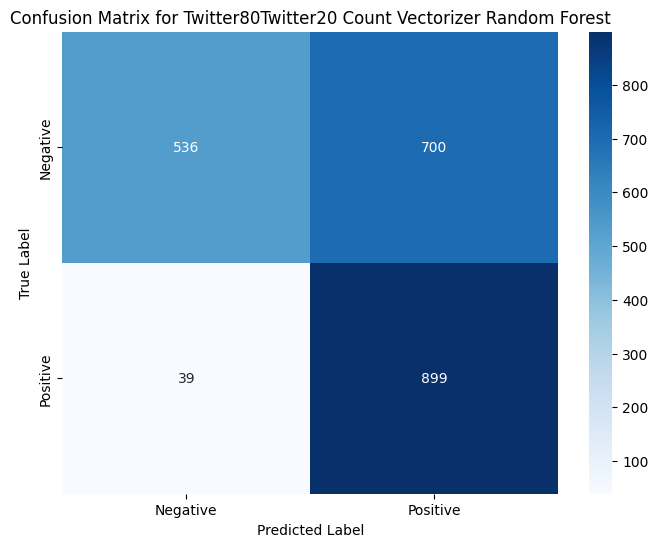


Metrics for Logistic Regression:
Accuracy: 0.734590616375345
Precision: 0.6322344322344322
Recall: 0.920042643923241
F1-score: 0.7494572297003907


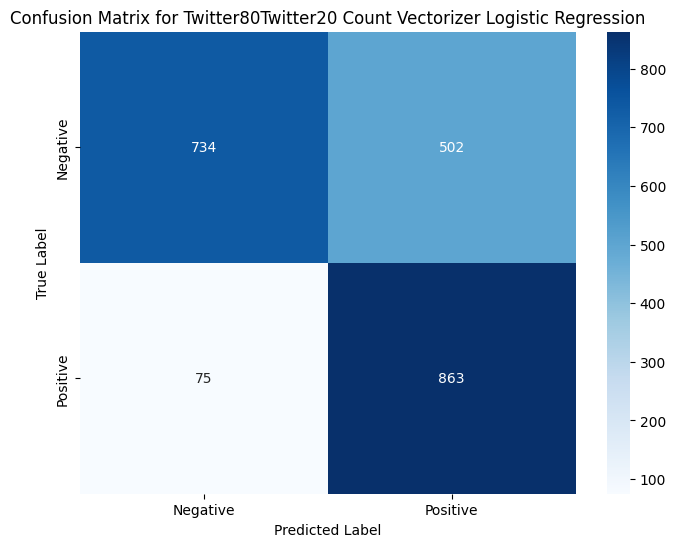


Metrics for SVM:
Accuracy: 0.593836246550138
Precision: 0.5161101347393088
Recall: 0.9392324093816631
F1-score: 0.6661625708884689


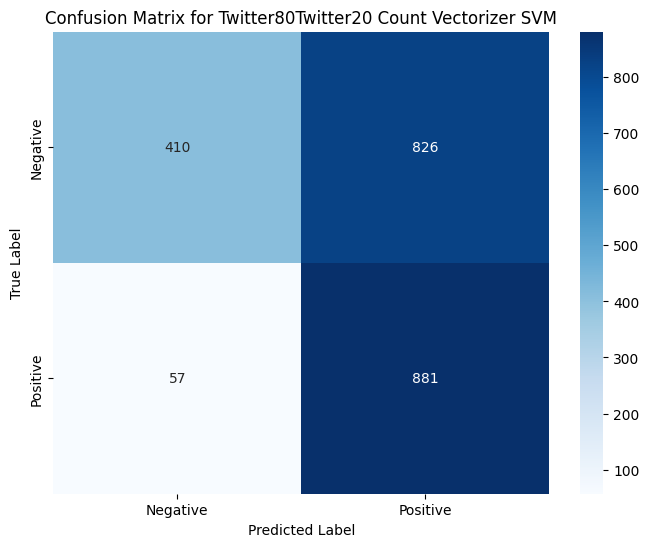


Metrics for Decision Tree:
Accuracy: 0.6660533578656854
Precision: 0.5715249662618084
Recall: 0.9029850746268657
F1-score: 0.7


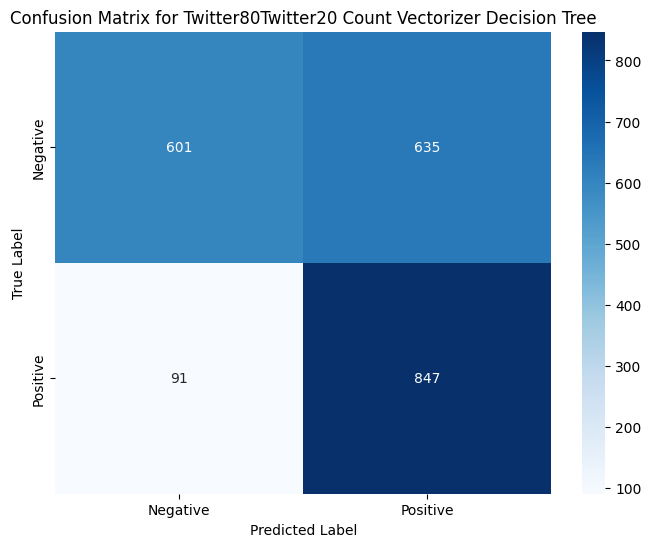


Metrics for KNN:
Accuracy: 0.671113155473781
Precision: 0.5790219702338767
Recall: 0.8710021321961621
F1-score: 0.6956151553852703


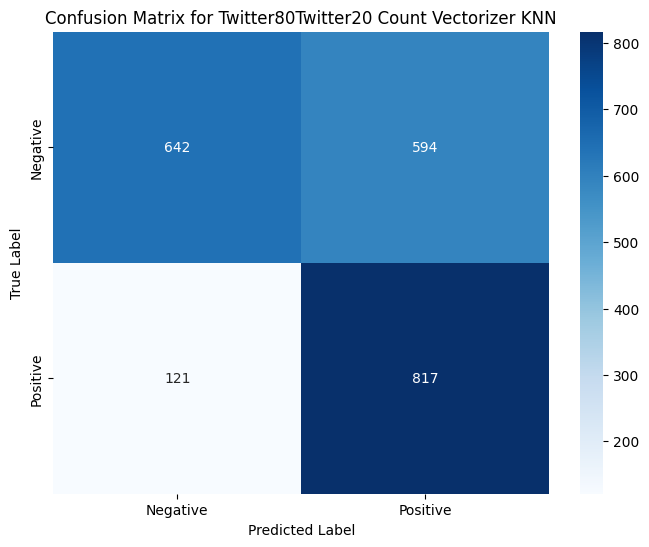


Metrics for XGBoost:
Accuracy: 0.6987120515179392
Precision: 0.5951580363147276
Recall: 0.9434968017057569
F1-score: 0.7298969072164949


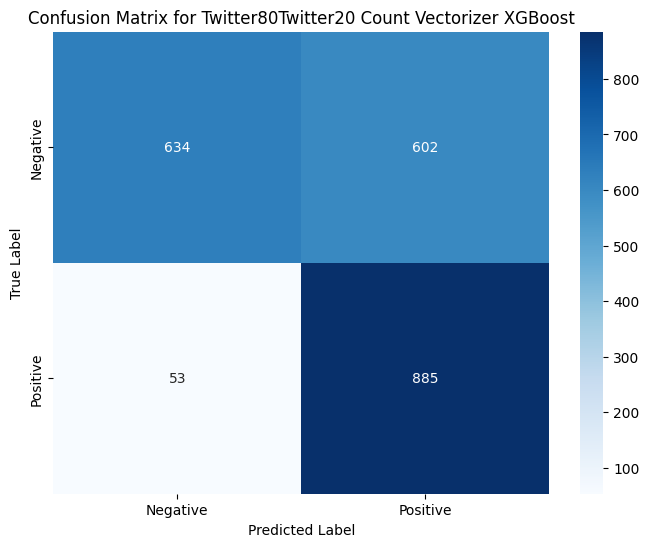

In [30]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}


for clf_name, clf in classifiers.items():
    clf.fit(X_train_twitter_cv_smote_lsa, y_train_twitter_cv_smote)
    t80t80cv = clf.predict(X_test_twitter80_cv)
    t80t80cv = np.round(t80t80cv)

    accuracyt80t80cv = accuracy_score(y_testtwitter,  t80t80cv)
    precisiont80t80cv = precision_score(y_testtwitter, t80t80cv)
    recallt80t80cv = recall_score(y_testtwitter, t80t80cv)
    f1t80t80cv = f1_score(y_testtwitter, t80t80cv)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:", accuracyt80t80cv)
    print("Precision:", precisiont80t80cv)
    print("Recall:", recallt80t80cv)
    print("F1-score:", f1t80t80cv)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_testtwitter,  t80t80cv)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for Twitter80Twitter20 Count Vectorizer {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

3. Twitter80-Reddit20-TFIDF



Metrics for Random Forest:
Accuracy: 0.5239573229873908
Precision: 0.5127911159068429
Recall: 0.9822166724078539
F1-score: 0.6738051633484965


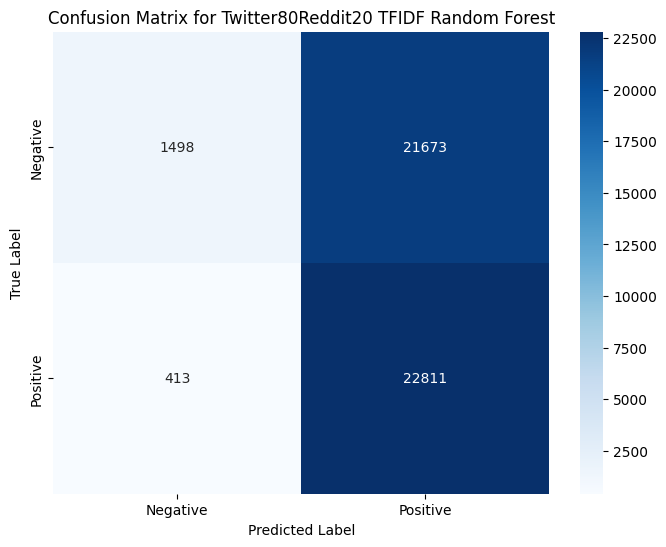


Metrics for Logistic Regression:
Accuracy: 0.536070697273413
Precision: 0.5192046995029372
Recall: 0.989493627282122
F1-score: 0.6810503230395353


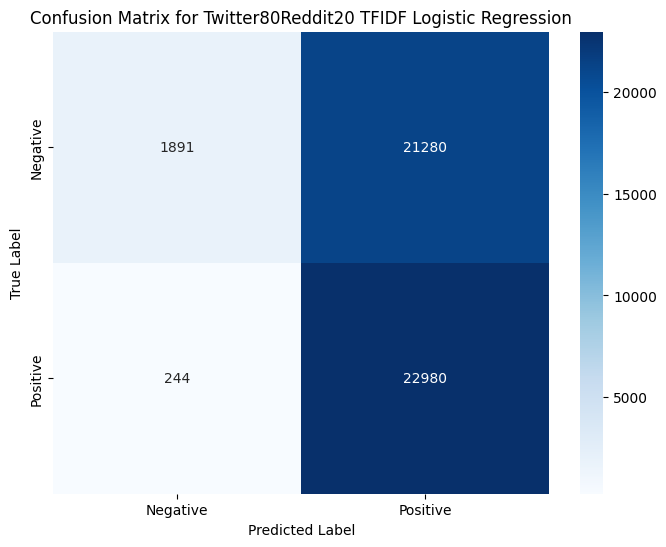


Metrics for SVM:
Accuracy: 0.60566871430111
Precision: 0.5623655641875649
Recall: 0.9568980365139511
F1-score: 0.7084043926618957


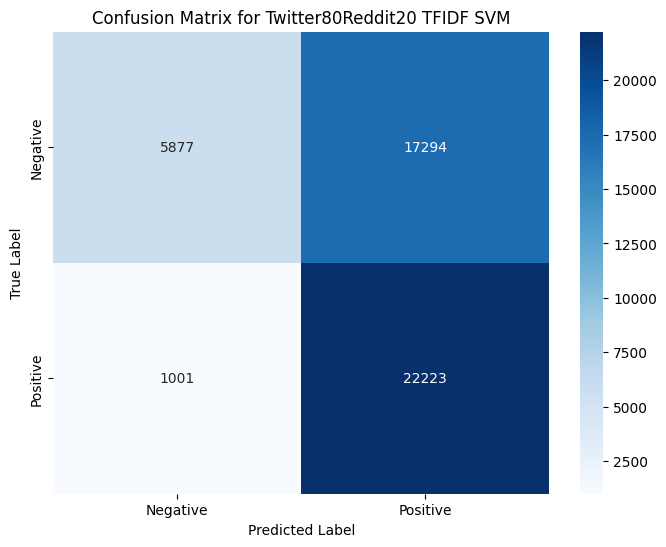


Metrics for Decision Tree:
Accuracy: 0.571440888026727
Precision: 0.5404136929962502
Recall: 0.9618498105408199
F1-score: 0.6920181539367091


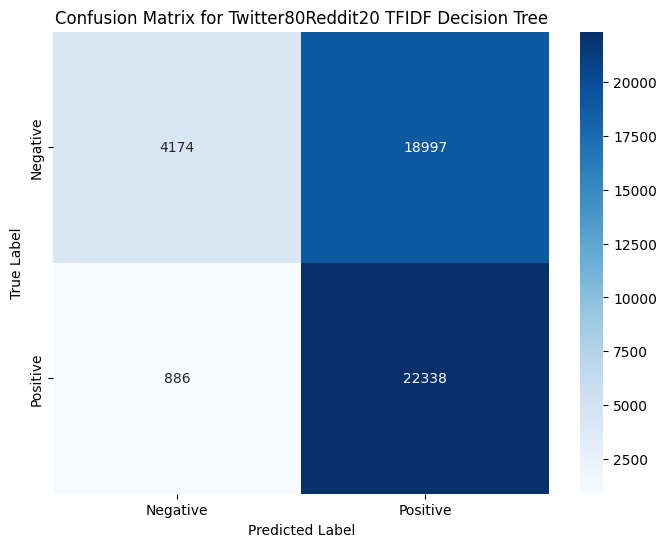


Metrics for KNN:
Accuracy: 0.6474835650393361
Precision: 0.6015913863992665
Recall: 0.875732001377885
F1-score: 0.7132261401693816


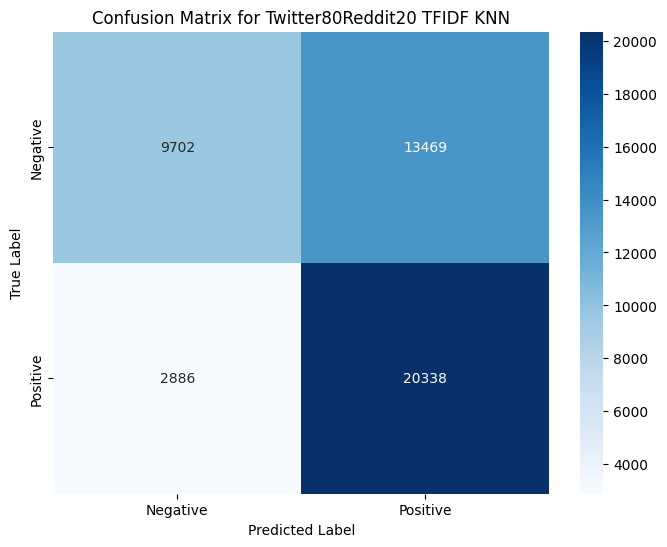


Metrics for XGBoost:
Accuracy: 0.5364155620217695
Precision: 0.5196293754289636
Recall: 0.9779968997588702
F1-score: 0.6786685391579765


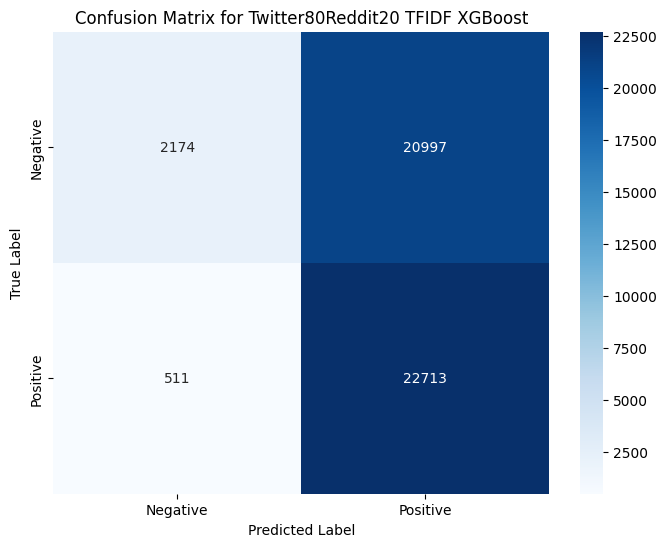

In [29]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_twitter_tfidf_smote_lsa, y_train_twitter_tfidf_smote)
    reddittrain80predictionstfidf = clf.predict(X_testreddit_tfidf_lsa)
    reddittrain80predictionstfidf = np.round(reddittrain80predictionstfidf)

    accuracyreddittrain80tfidf = accuracy_score(y_testreddit80, reddittrain80predictionstfidf)
    precisionreddittrain80tfidf = precision_score(y_testreddit80, reddittrain80predictionstfidf)
    recallreddittrain80tfidf = recall_score(y_testreddit80, reddittrain80predictionstfidf)
    f1reddittrain80tfidf = f1_score(y_testreddit80, reddittrain80predictionstfidf)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:",  accuracyreddittrain80tfidf)
    print("Precision:", precisionreddittrain80tfidf)
    print("Recall:", recallreddittrain80tfidf)
    print("F1-score:", f1reddittrain80tfidf)

    # Confusion matrix
    conf_matrixreddittrain80tfidf = confusion_matrix(y_testreddit80, reddittrain80predictionstfidf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrixreddittrain80tfidf, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for Twitter80Reddit20 TFIDF {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


3. Reddit80_Twitter20_CountVectorizer
- X_train: X_trainreddit80_cv_lsa
- y_train: y_trainreddit80_cv
- X_test: X_test_twitter80_cv
- y_test: y_testtwitter80_cv


Metrics for Random Forest:
Accuracy: 0.6232750689972401
Precision: 0.6561679790026247
Recall: 0.26652452025586354
F1-score: 0.37907505686125853


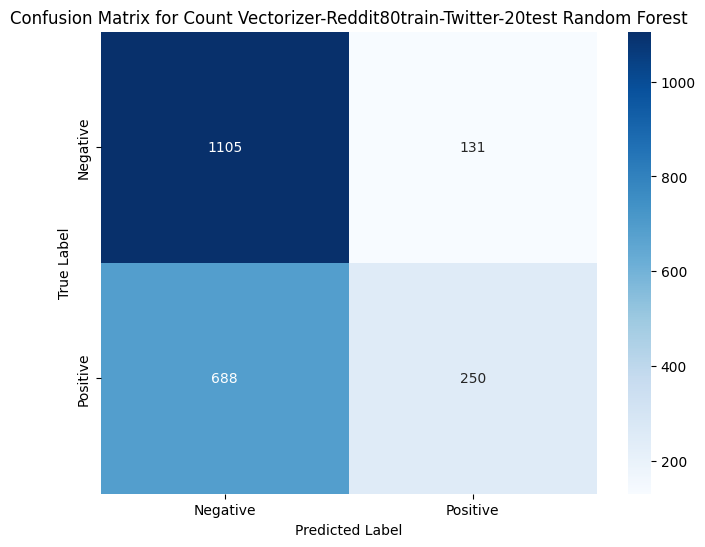

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Metrics for Logistic Regression:
Accuracy: 0.5666973321067157
Precision: 0.4969512195121951
Recall: 0.34754797441364604
F1-score: 0.4090338770388958


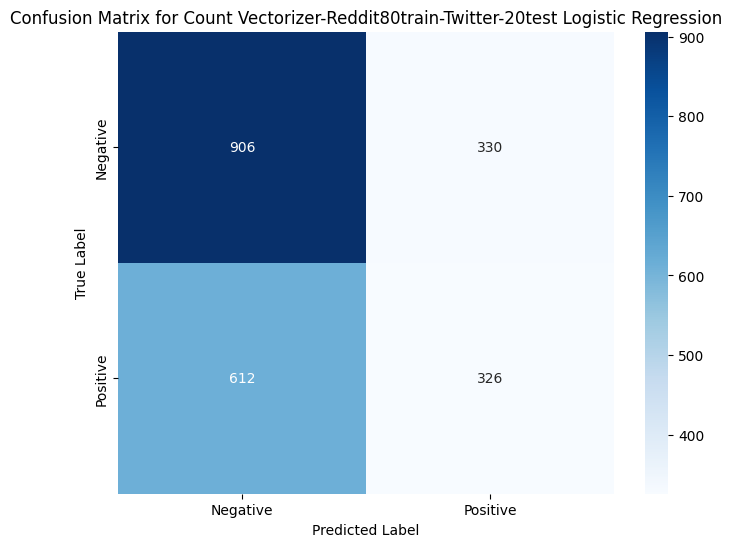


Metrics for SVM:
Accuracy: 0.624655013799448
Precision: 0.7346153846153847
Recall: 0.20362473347547974
F1-score: 0.31886477462437396


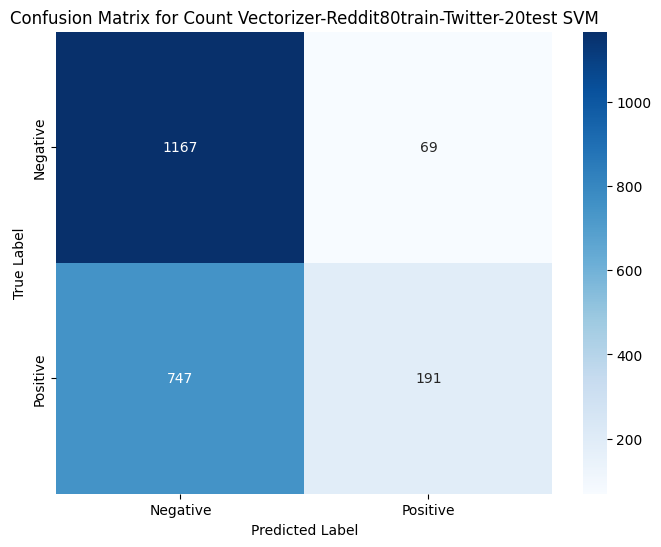


Metrics for Decision Tree:
Accuracy: 0.5837166513339467
Precision: 0.5204968944099378
Recall: 0.4466950959488273
F1-score: 0.48078026391279405


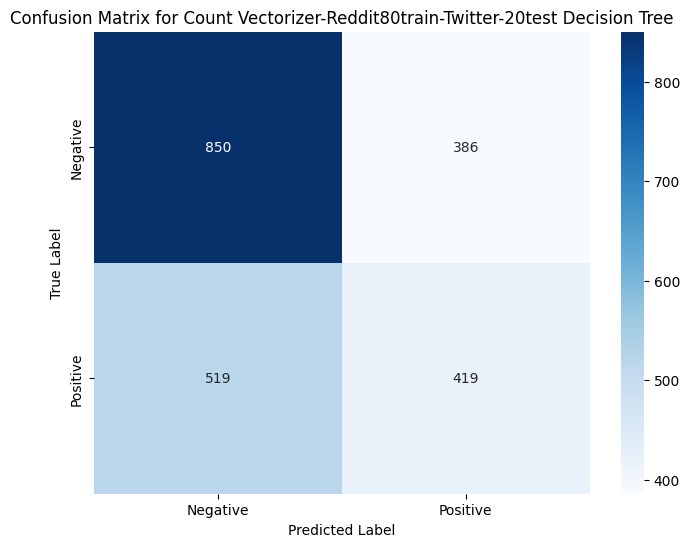


Metrics for KNN:
Accuracy: 0.4898804047838086
Precision: 0.16470588235294117
Recall: 0.04477611940298507
F1-score: 0.07041072925398156


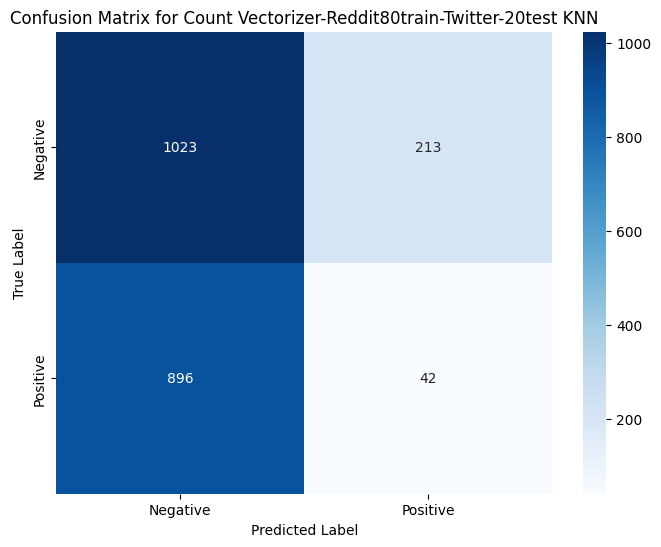


Metrics for XGBoost:
Accuracy: 0.5763569457221711
Precision: 0.6666666666666666
Recall: 0.03624733475479744
F1-score: 0.06875631951466127


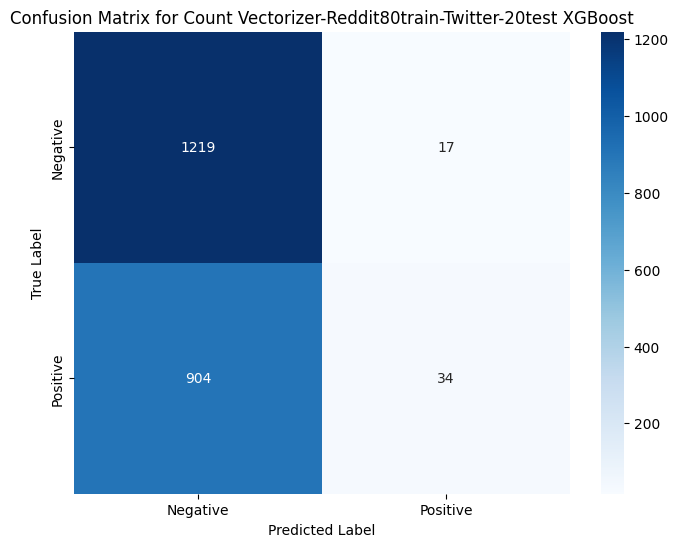

In [ ]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_trainreddit80_cv_lsa_smote, y_trainreddit80_cv_smote)
    reddittrain80predictionscount = clf.predict(X_test_twitter80_cv)

    with open(f'{clf_name.lower().replace(" ", "_")}_reddit80twitter20countvectorizermodel.pkl', 'wb') as file:
        pickle.dump(clf, file)

    accuracyreddittrain80count = accuracy_score(y_testtwitter80_cv, reddittrain80predictionscount)
    precisionreddittrain80count = precision_score(y_testtwitter80_cv, reddittrain80predictionscount)
    recallreddittrain80count = recall_score(y_testtwitter80_cv, reddittrain80predictionscount)
    f1reddittrain80count = f1_score(y_testtwitter80_cv, reddittrain80predictionscount)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:", accuracyreddittrain80count)
    print("Precision:", precisionreddittrain80count)
    print("Recall:", recallreddittrain80count)
    print("F1-score:", f1reddittrain80count)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_testtwitter80_cv,  reddittrain80predictionscount)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for Count Vectorizer-Reddit80train-Twitter-20test {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

4. Twitter80Reddit20CountVectorizer
- X_train: X_train_twitter_cv_smote_lsa
- y_train: y_train_twitter_cv_smote
- X_test: X_testreddit80_cv_lsa
- y_test: y_testreddit80_cv


Metrics for Random Forest:
Accuracy: 0.4343571505550167
Precision: 0.462564789326191
Recall: 0.8031346882535308
F1-score: 0.587030072230003


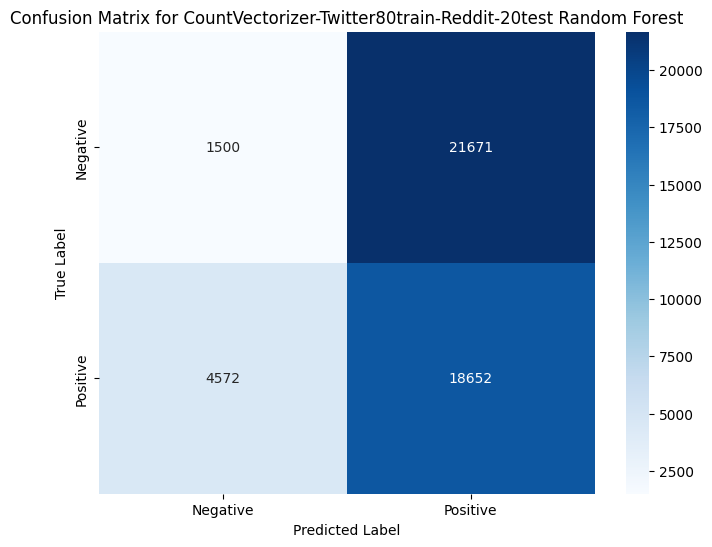


Metrics for Logistic Regression:
Accuracy: 0.41905377734669685
Precision: 0.31130452383362006
Recall: 0.13244919049259388
F1-score: 0.18583295574686604


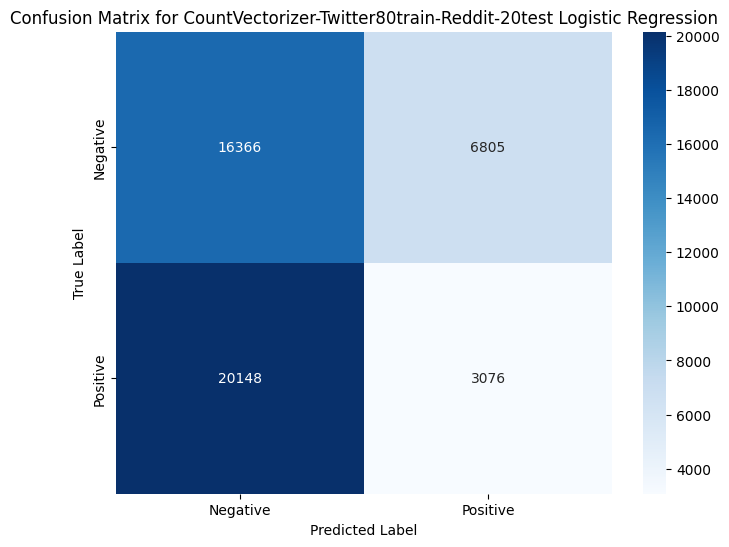


Metrics for SVM:
Accuracy: 0.5435930595969394
Precision: 0.5268594499646069
Recall: 0.8653117464691699
F1-score: 0.6549448400606189


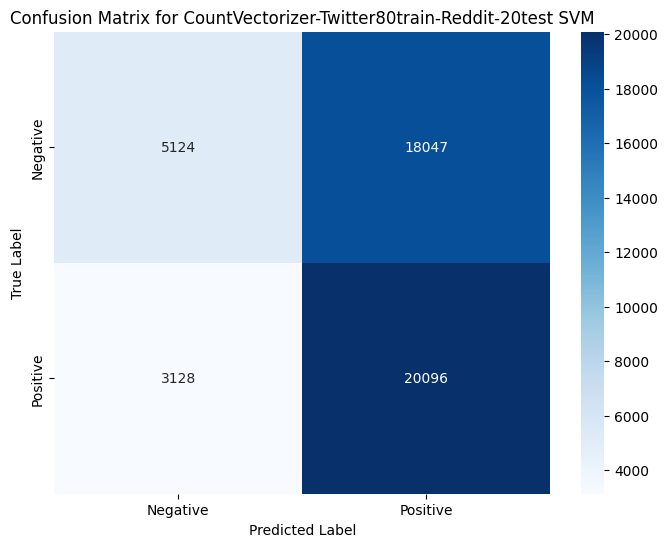


Metrics for Decision Tree:
Accuracy: 0.49779071020584115
Precision: 0.4975049244911359
Recall: 0.32625732001377883
F1-score: 0.3940812399230249


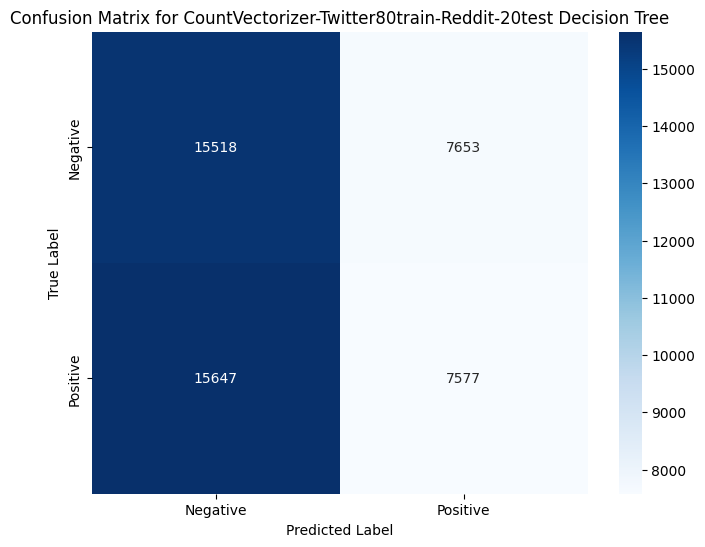


Metrics for KNN:
Accuracy: 0.40366418795128783
Precision: 0.36692026597975197
Recall: 0.2637357905614881
F1-score: 0.3068867900894356


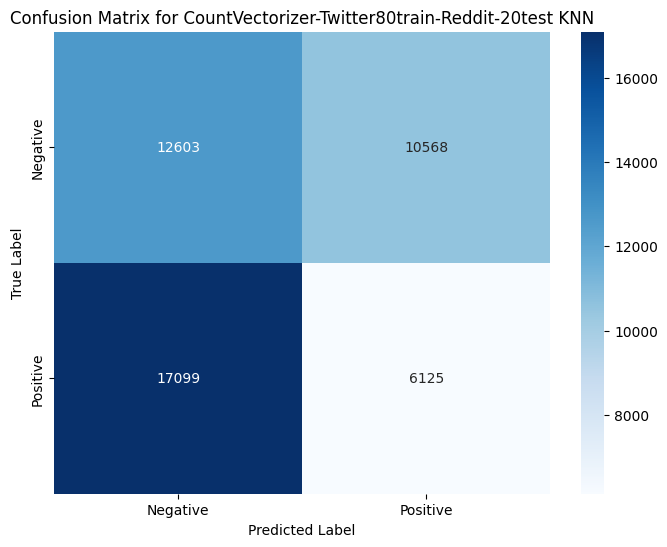


Metrics for XGBoost:
Accuracy: 0.5240219851277077
Precision: 0.5131886168712578
Recall: 0.9558646228039959
F1-score: 0.667829906289015


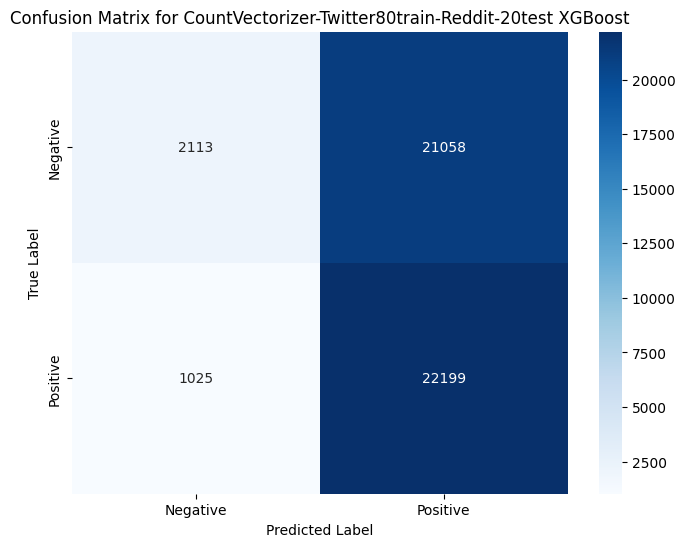

In [ ]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}


for clf_name, clf in classifiers.items():
    clf.fit(X_train_twitter_cv_smote_lsa, y_train_twitter_cv_smote)
    twittertrain80predictionscv = clf.predict(X_testreddit80_cv_lsa)

    with open(f'{clf_name.lower().replace(" ", "_")}_cvtwitter80_model.pkl', 'wb') as file:
        pickle.dump(clf, file)

    accuracytwittertrain80predictionscv = accuracy_score(y_testreddit80_cv,  twittertrain80predictionscv)
    precisiontwittertrain80predictionscv = precision_score(y_testreddit80_cv, twittertrain80predictionscv)
    recalltwittertrain80predictionscv = recall_score(y_testreddit80_cv, twittertrain80predictionscv)
    f1twittertrain80predictionscv = f1_score(y_testreddit80_cv, twittertrain80predictionscv)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:", accuracytwittertrain80predictionscv)
    print("Precision:", precisiontwittertrain80predictionscv)
    print("Recall:", recalltwittertrain80predictionscv)
    print("F1-score:", f1twittertrain80predictionscv)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_testreddit80_cv,  twittertrain80predictionscv)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for CountVectorizer-Twitter80train-Reddit-20test {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

#Grid Search and K-Fold Validation

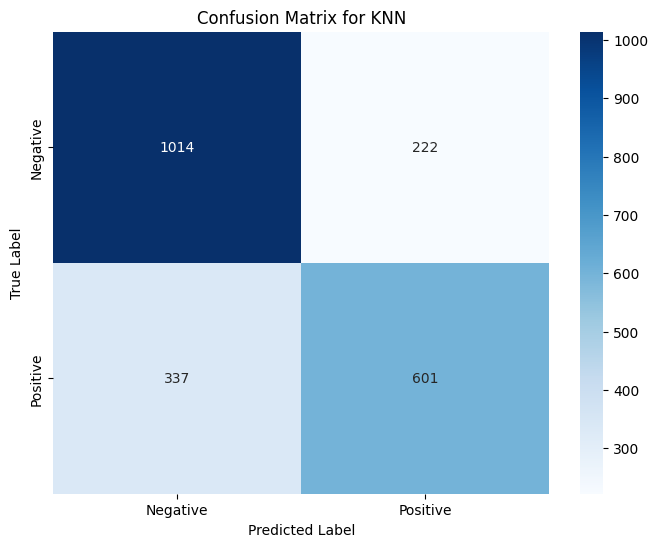

Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.7428702851885924
Precision: 0.7302551640340219
Recall: 0.6407249466950959
F1-score: 0.6825667234525838


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote)

best_knn = grid_search.best_estimator_
y_predknngs = best_knn.predict(X_test_twitter80_tfidf)

accuracyknngs = accuracy_score(y_testtwitter80_tfidf, y_predknngs)
precisionknngs = precision_score(y_testtwitter80_tfidf, y_predknngs)
recallknngs = recall_score(y_testtwitter80_tfidf, y_predknngs)
f1knngs = f1_score(y_testtwitter80_tfidf, y_predknngs)
conf_matrixgridsearchknn = confusion_matrix(y_testtwitter80_tfidf, y_predknngs)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixgridsearchknn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracyknngs)
print("Precision:", precisionknngs)
print("Recall:", recallknngs)
print("F1-score:", f1knngs)

#Visualization purposes

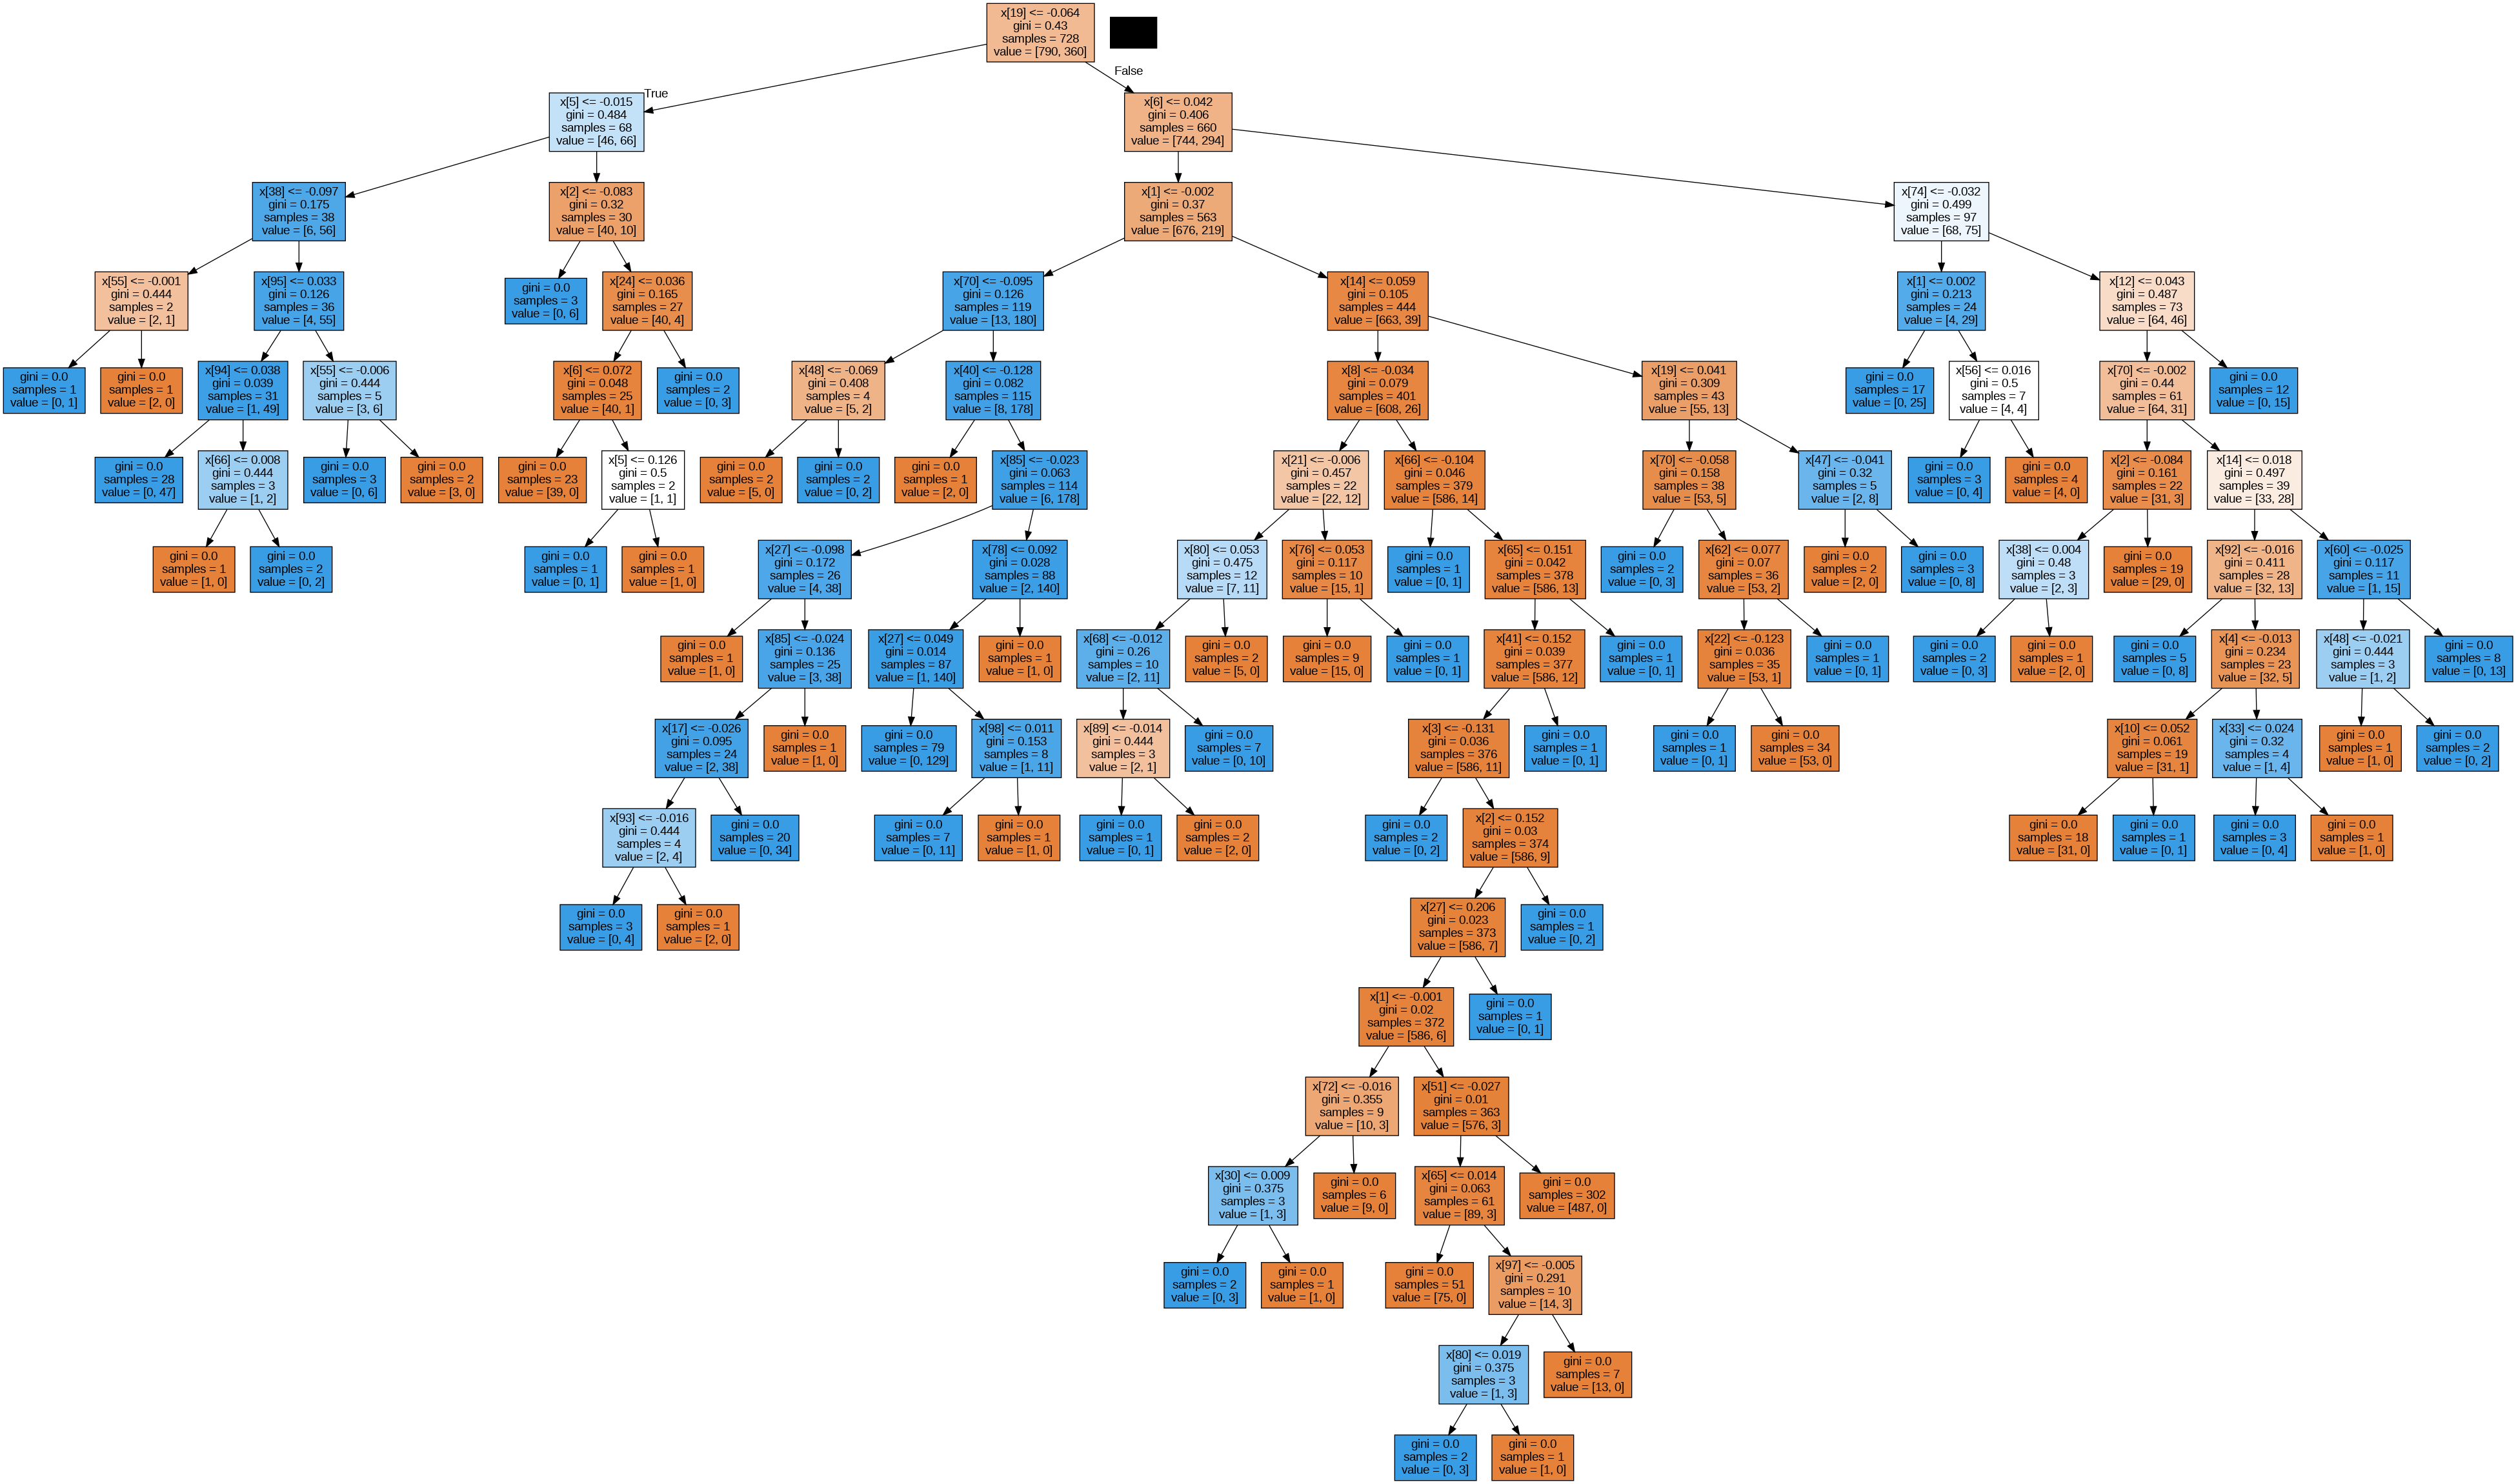

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image


rf_clf = RandomForestClassifier()
rf_clf.fit(X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote)
estimator = rf_clf.estimators_[0]
export_graphviz(estimator, out_file="rf_tree.dot",filled=True)
graph = pydotplus.graph_from_dot_file("rf_tree.dot")
graph.write_png("rf_tree.png")
Image("rf_tree.png")


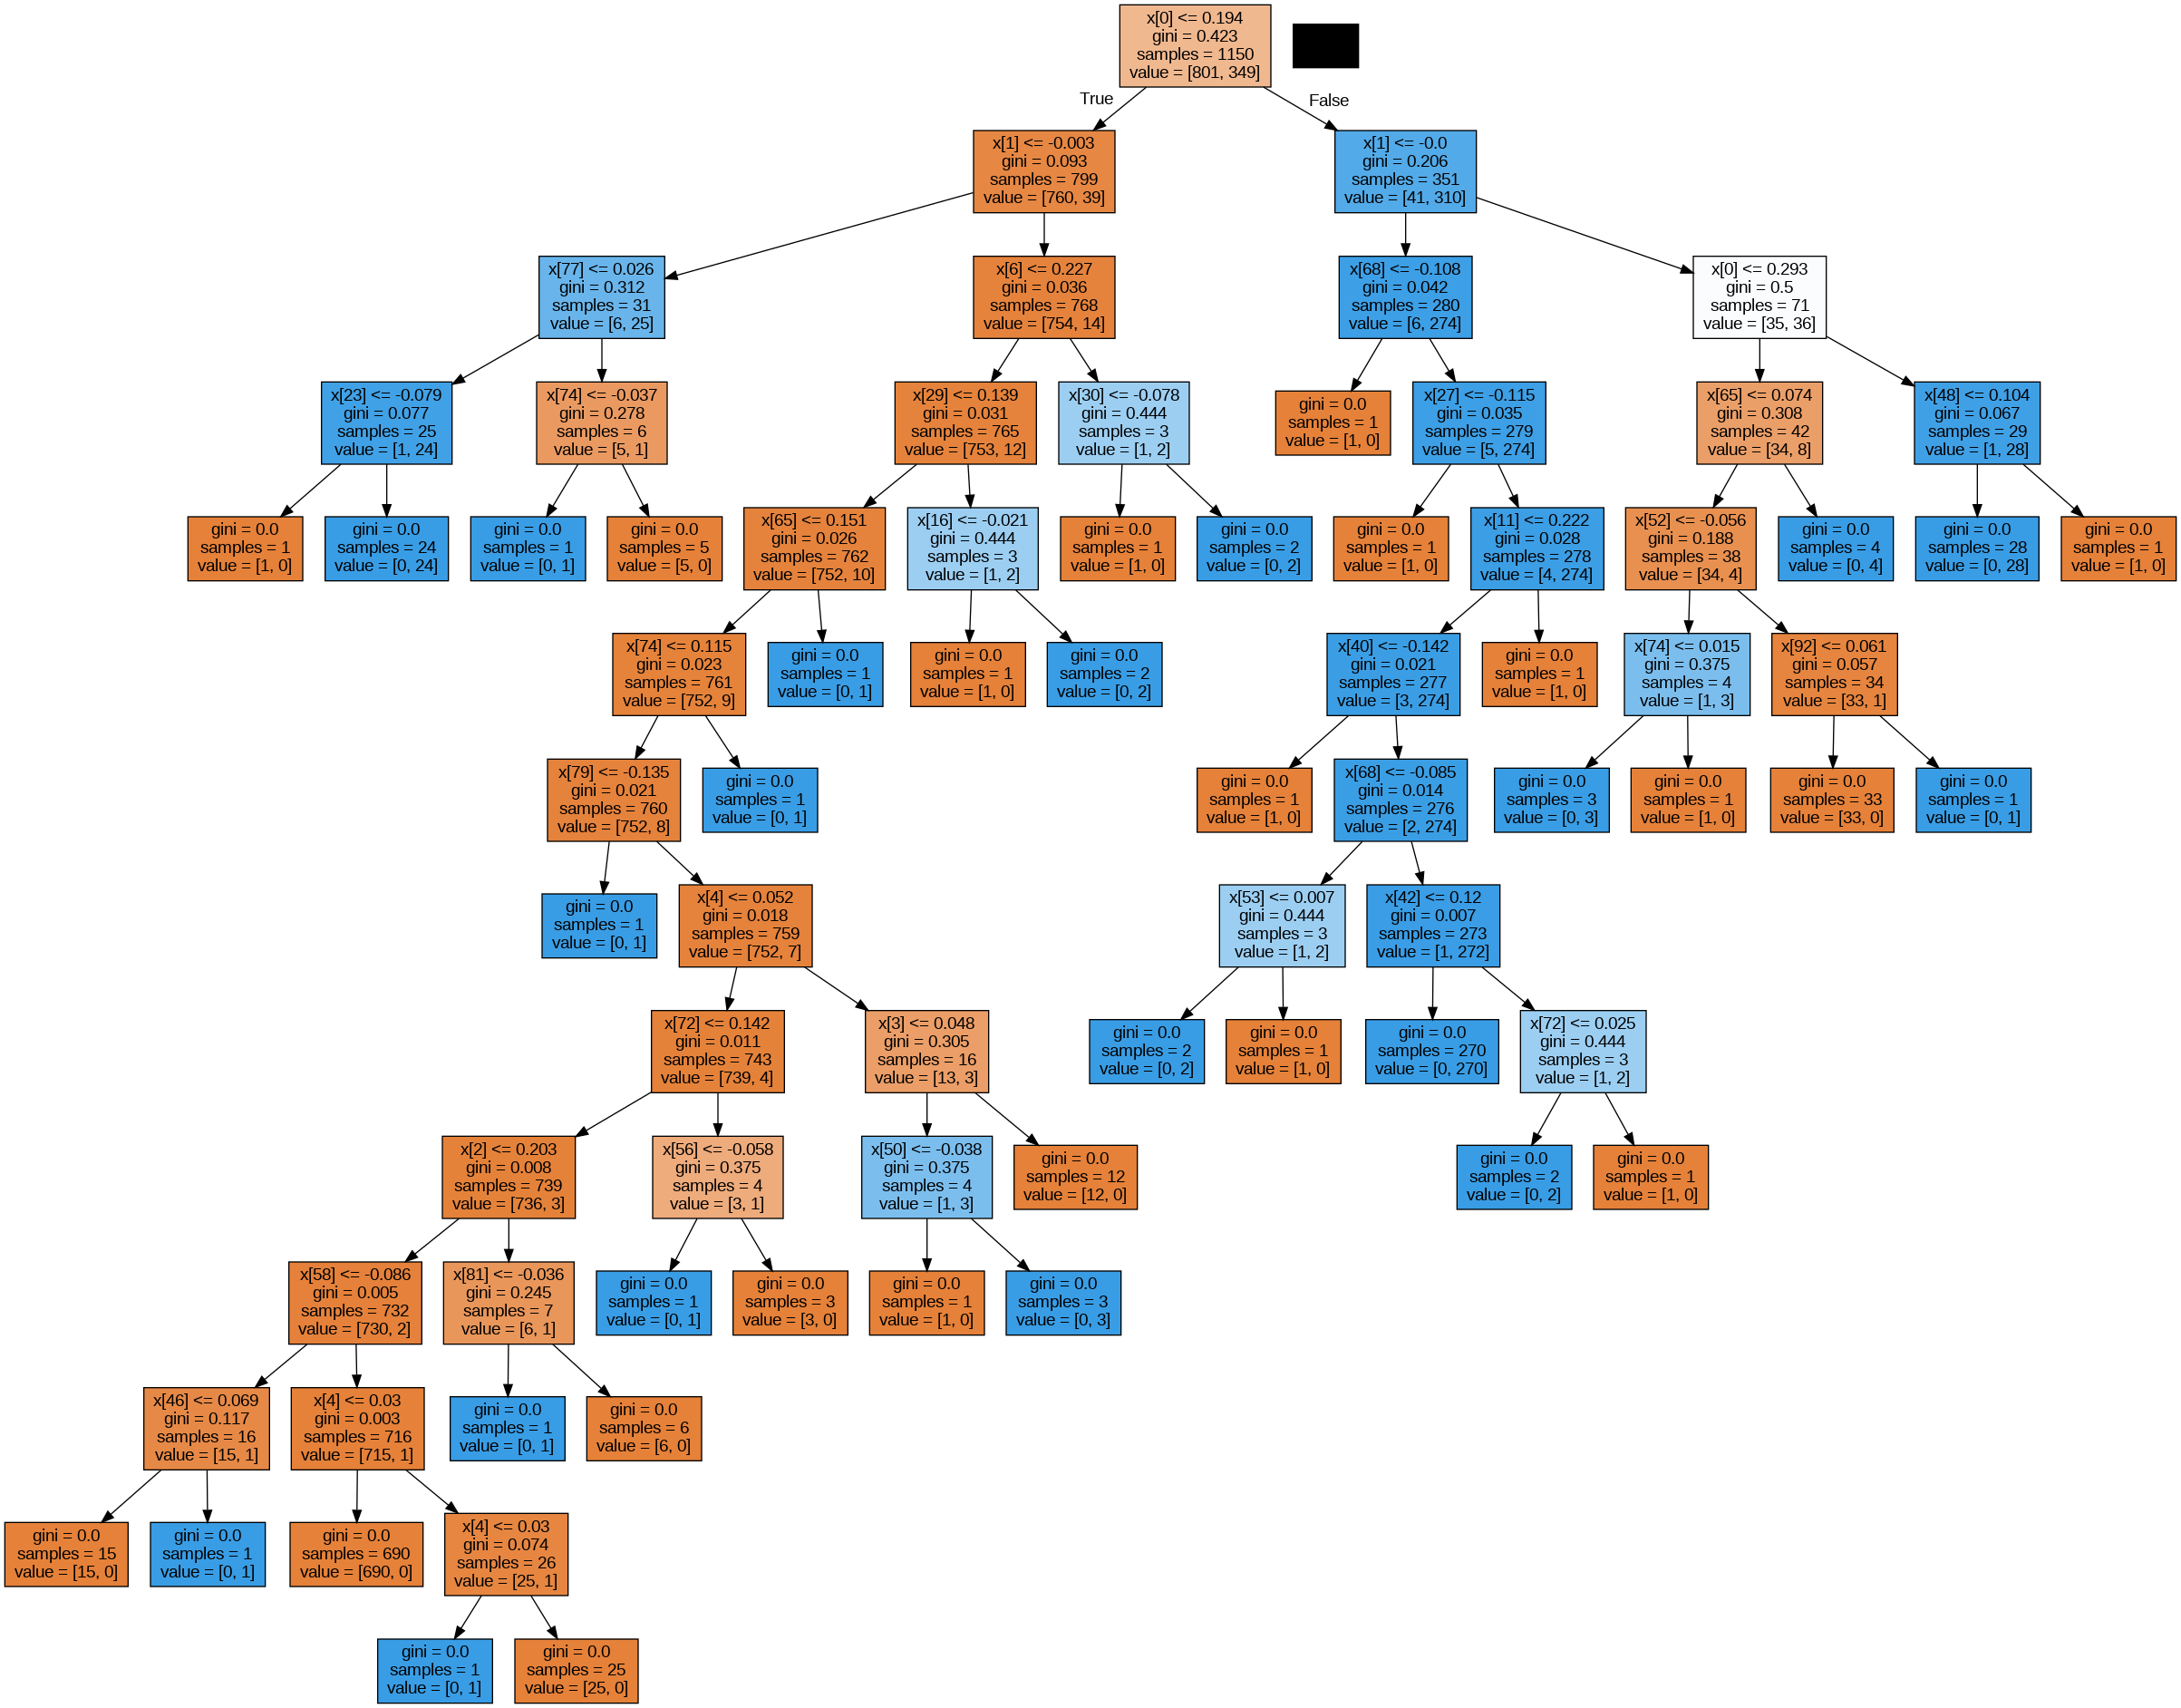

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote)
export_graphviz(dt_clf, out_file="dt_tree.dot", filled=True)
graph = pydotplus.graph_from_dot_file("dt_tree.dot")
graph.write_png("dt_tree.png")

# Display the PNG image
Image("dt_tree.png")


<Figure size 2000x2000 with 0 Axes>

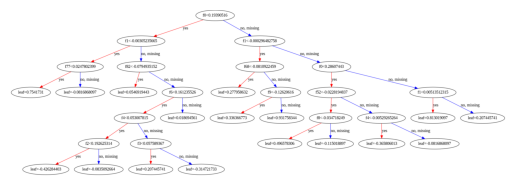

In [ ]:
from xgboost import XGBClassifier, plot_tree
import matplotlib.pyplot as plt

xgb_clf = XGBClassifier()
xgb_clf.fit(X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote)
plt.figure(figsize=(20,20))
plot_tree(xgb_clf, num_trees=0)
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.2 MB/s eta 0:00:00


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=ace78f1cb368457a701919bea2fdd83a50fb1a84bcb2ddb314168e3788885a6e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


  0%|          | 0/2174 [00:00<?, ?it/s]

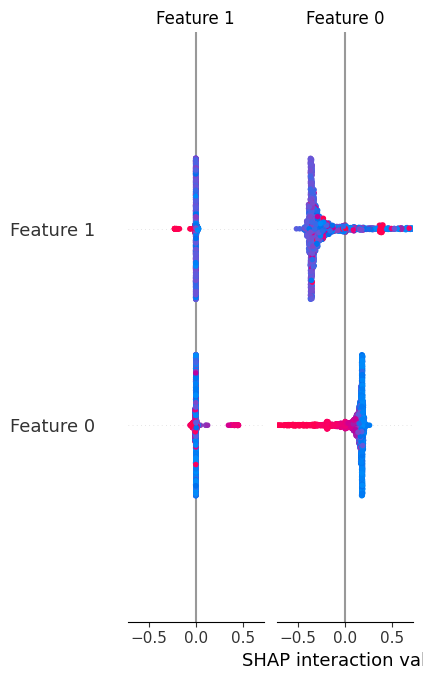

In [ ]:
import shap
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_clf.fit(X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote)
background_samples = shap.sample(X_trainreddit80_tfidf_lsa_smotee, 100)  # Use 100 samples for background
explainer = shap.KernelExplainer(knn_clf.predict_proba, background_samples)
shap_values = explainer.shap_values(X_test_twitter80_tfidf)

In [ ]:
import pickle

# Save SHAP values to a file
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(knn_clf, f)

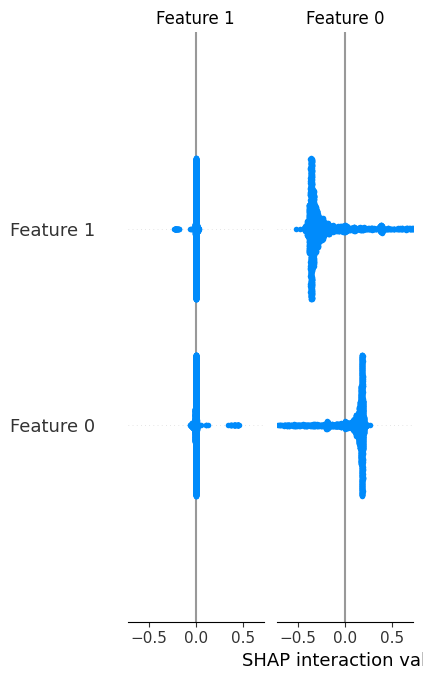

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.summary_plot(shap_values)
plt.tight_layout()

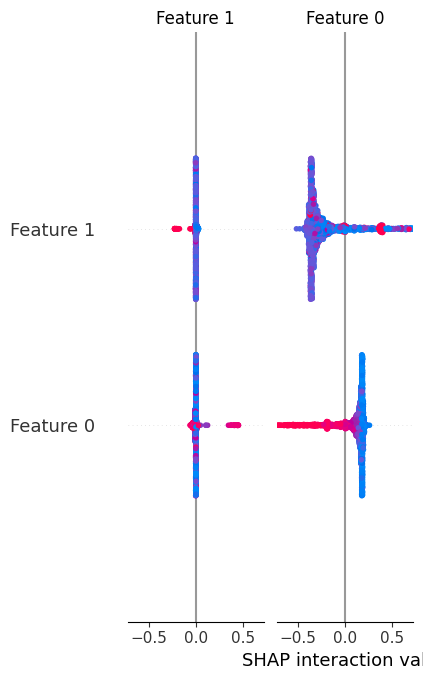

In [ ]:
shap.summary_plot(shap_values, X_test_twitter80_tfidf)

In [ ]:
y_trainreddit80_tdidfdf = pd.DataFrame(y_trainreddit80_tfidf)

In [ ]:
import ipywidgets as widgets

In [ ]:
list_of_labels = y_trainreddit80_tdidfdf.columns.to_list()

tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# Create a widget for the labels and then display the widget
current_label = widgets.Dropdown(
    options=tuple_of_labels, value=0, description="Select Label:"
)

# Display the dropdown list (Note: access index value with 'current_label.value')
current_label


Dropdown(description='Select Label:', options=(('class', 0),), value=0)

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f"Current label Shown: {list_of_labels[current_label.value]}")

shap.force_plot(
    base_value=explainer.expected_value[current_label.value],
    shap_values=shap_values[current_label.value],
)

Current label Shown: class


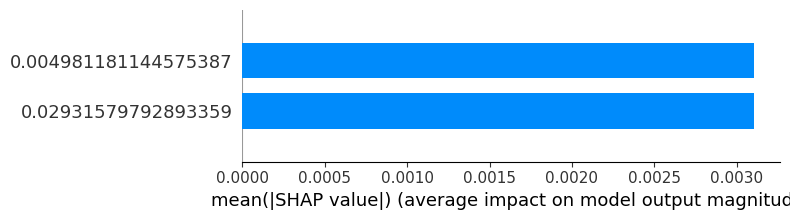

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.summary_plot(shap_values[1], X_trainreddit80_tfidf_lsa_smotee[1], plot_type='bar')

plt.savefig('shap_summary_plot_single_sample.png')
plt.show()

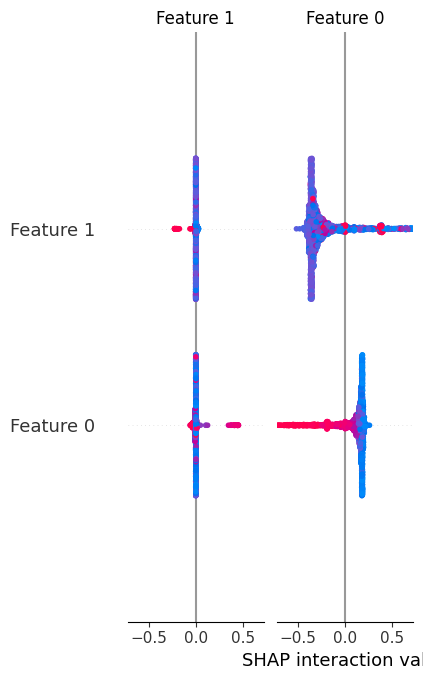

In [ ]:
shap.summary_plot(shap_values, X_test_twitter80_tfidf, plot_type='box')


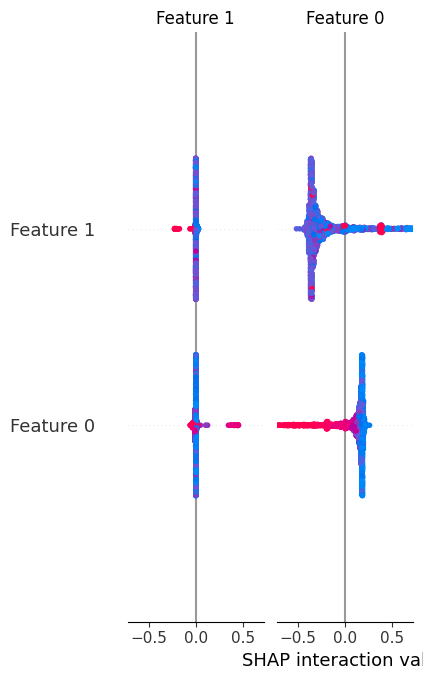

In [ ]:
shap.summary_plot(shap_values, X_test_twitter80_tfidf, plot_type='bar')


Feature Engineering
1. Bag of Words
2. TF-IDF
3. Latent Semantic Indexing
4. N-grams
5. Latent Dirichlet Allocation

Machine Learning

1. Random Forest
2. SVM
3. Naive Bayes
4. Decision Tree
5. Logistic Regression

Deep Learning
1. BERT
2. LSTM
3. GRU